#### The Opening Price, Closing Price, Highest Price, Lowest Price of Yes Bank all followed an upward sloping trend till 2018 and then the sharp downward sloping pattern after 2018, this thing can be attributed to the Yes bank detoriating financial condition that started from 2018.Companies that failed to repay their loans to YES Bank include Dewan Housing Finance, Essel group, CG Power, the Anil Ambani group companies, and Videocon.The crisis at the bank began in 2018 and grew gradually. In September that year, the RBI reduced Rana Kapoor’s new three-year term as CEO until January 31, 2019. The next day, the YES Bank stock tanked 30 per cent and continued its downward spiral. For complete details more can be read at https://www.business-standard.com/podcast/companies/yes-bank-stock-crash-and-financial-mess-how-the-crisis-unfolded-in-2-years-120030600886_1.html respectively.<font color='red'>Thus to find the effect of the Financial Scam we Forecasted the Expected Loss in Stock Price of Yes Bank due to the 2018 financial crunch by fitting the SARIMA model.We have also Performed the same exercise for Returns and analysed the drawbacks of the model respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import pylab
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model

In [2]:
from pmdarima import auto_arima

In [3]:
Yes=pd.read_csv("YesBank_StockPrices.csv")

In [4]:
Yes.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
Yes

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [6]:
Yes.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [7]:
Yes.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [8]:
Yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
Yes.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
Yes.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


##### Checking for missing values

In [11]:
Yes.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### As one can see there is no missing values for our dataframe respectively

##### Creating return table where return is Closing Price minus opening price divided by the opening Prices respectively.

In [12]:
Yes['return']=(Yes['Close']-Yes['Open']).div(Yes['Open']).mul(100)

<AxesSubplot:>

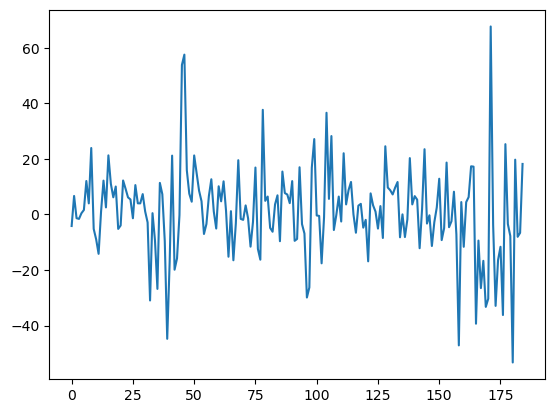

In [13]:
Yes['return'].plot(x=Yes["Date"])

In [14]:
Yes

,Date,Open,High,Low,Close,return
0,Jul-05,13.00,14.00,11.25,12.46,-4.153846
1,Aug-05,12.58,14.88,12.55,13.42,6.677266
2,Sep-05,13.48,14.87,12.27,13.30,-1.335312
3,Oct-05,13.20,14.47,12.40,12.99,-1.590909
4,Nov-05,13.35,13.88,12.88,13.41,0.449438
...,...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95,-53.320312
181,Aug-20,12.00,17.16,11.85,14.37,19.750000
182,Sep-20,14.30,15.34,12.75,13.15,-8.041958
183,Oct-20,13.30,14.01,12.11,12.42,-6.616541


#### Preparing the Time Series and Basic EDA

To be able to apply ARIMA to a data, the date column needs to be converted into a date time object and then made the index of the dataframe. This is achieved by using strptime of the datetime library. The Given Date format MMM-YY is converted to proper date of YYYY-MM-DD, that Date is set as index and frequency of the Date is set to 'MS' which is monthly

In [15]:
from datetime import datetime
Yes['Date'] = Yes['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [16]:
Yes.head()

,Date,Open,High,Low,Close,return
0,2005-07-01,13.00,14.00,11.25,12.46,-4.153846
1,2005-08-01,12.58,14.88,12.55,13.42,6.677266
2,2005-09-01,13.48,14.87,12.27,13.30,-1.335312
3,2005-10-01,13.20,14.47,12.40,12.99,-1.590909
4,2005-11-01,13.35,13.88,12.88,13.41,0.449438


#### As one can see the Month Year format that was in words earlier have been converted to proper Year Month format respectively

#### Dropping the index column and using the Date column instead of it respectively

In [17]:
Yes.index=Yes['Date']

In [18]:
Yes.drop('Date',axis=1,inplace=True)

In [19]:
Yes

,Open,High,Low,Close,return
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-4.153846
2005-08-01,12.58,14.88,12.55,13.42,6.677266
2005-09-01,13.48,14.87,12.27,13.30,-1.335312
2005-10-01,13.20,14.47,12.40,12.99,-1.590909
2005-11-01,13.35,13.88,12.88,13.41,0.449438
...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95,-53.320312
2020-08-01,12.00,17.16,11.85,14.37,19.750000
2020-09-01,14.30,15.34,12.75,13.15,-8.041958


In [20]:
Yes.index.freq = 'MS'

In [21]:
Yes

,Open,High,Low,Close,return
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-4.153846
2005-08-01,12.58,14.88,12.55,13.42,6.677266
2005-09-01,13.48,14.87,12.27,13.30,-1.335312
2005-10-01,13.20,14.47,12.40,12.99,-1.590909
2005-11-01,13.35,13.88,12.88,13.41,0.449438
...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95,-53.320312
2020-08-01,12.00,17.16,11.85,14.37,19.750000
2020-09-01,14.30,15.34,12.75,13.15,-8.041958


### EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Date'>

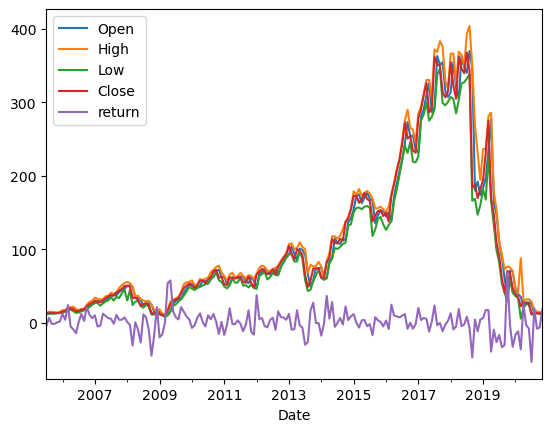

In [22]:
Yes.plot()

#### Though seasonality is not evident from the plotting, one can see other than the return plot, all the Opening Price, Closing Price, Highest Price, Lowest Price all follows an upward sloping trend till 2018 and then the sharp downward sloping pattern after 2018, this thing can be attributed to the Yes bank detoriating financial condition that started from 2018.Companies that failed to repay their loans to YES Bank include Dewan Housing Finance, Essel group, CG Power, the Anil Ambani group companies, and Videocon.The crisis at the bank began in 2018 and grew gradually. In September that year, the RBI reduced Rana Kapoor’s new three-year term as CEO until January 31, 2019. The next day, the YES Bank stock tanked 30 per cent and continued its downward spiral. For complete details more can be read at https://www.business-standard.com/podcast/companies/yes-bank-stock-crash-and-financial-mess-how-the-crisis-unfolded-in-2-years-120030600886_1.html respectively.

For our analysis we will mainly use the Closing Price column and return column mainly 

Now that the dataframe is ready, we divide it into train and test for modeling and testing. For this example, The last two years, Jan 2019- Nov 2020, are taken as test, Rest everything is train, Since we have 185 observations and complete monthly data for each year, last 2 years account to 24 months and and hence 161 (185-24) observations are kept for training and rest is for testing respectively.

In [23]:
#### Train test split
data = Yes.iloc[:162]
test = Yes.iloc[162:]

<AxesSubplot:xlabel='Date'>

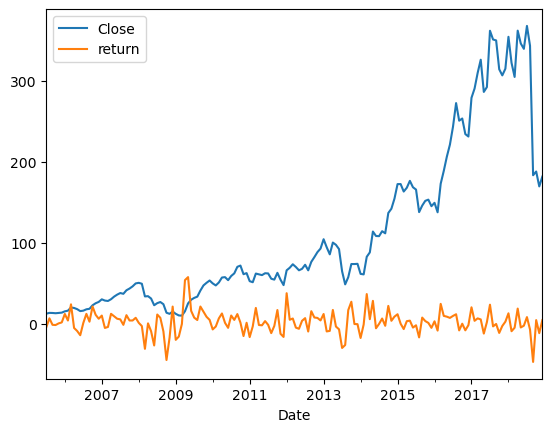

In [24]:
#### Plotting the data
data[['Close','return']].plot()

#### Checking for stationarity with ADF test

Checking for stationarity of Closing Price column

In [25]:
adfuller(data['Close'])

(-0.6132863403101313,
 0.8679515078573103,
 14,
 147,
 {'1%': -3.4756368462466662,
  '5%': -2.8814104466172608,
  '10%': -2.5773652982553568},
 1261.9114759077308)

#### Cleary Closing price is non stationary as we fail reject The Null Hypothesis of Non Stationarity respectively, Hence to have a clear idea we check the acf plot and seasonal decomposition of Closing Price respectively

#### The ACF plot for closing price

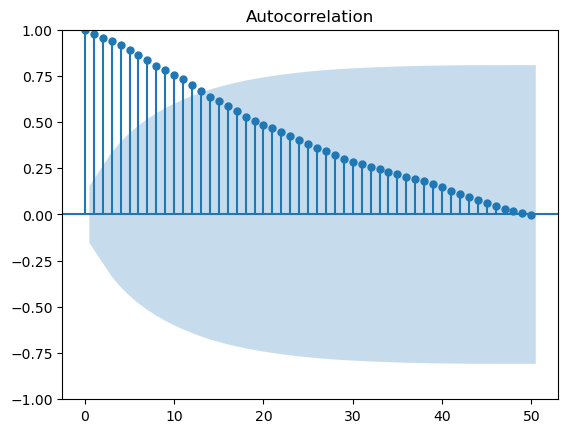

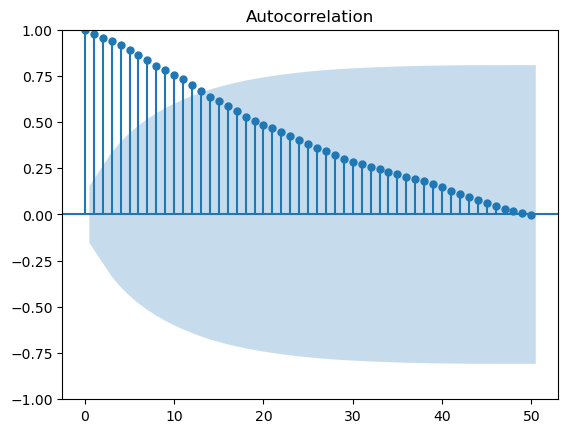

In [26]:
sgt.plot_acf(data['Close'],lags=50)

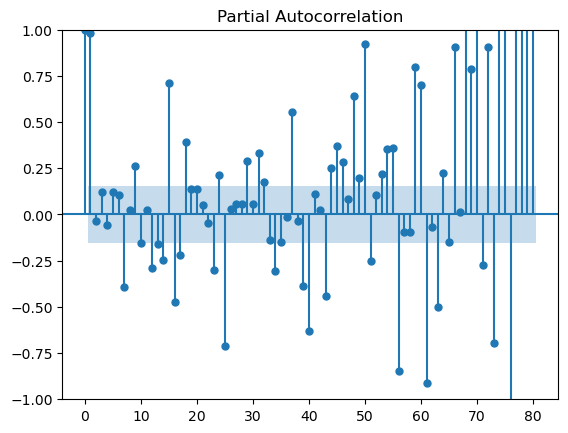

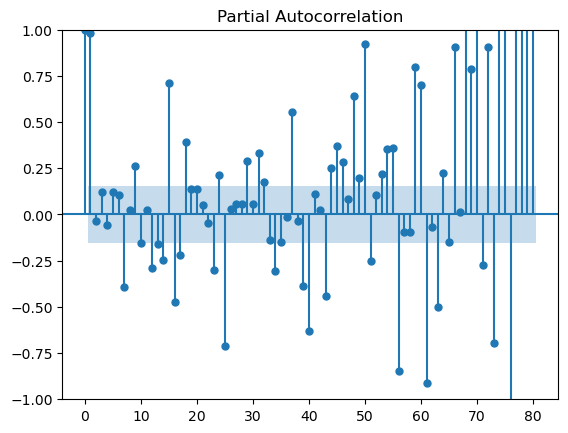

In [27]:
sgt.plot_pacf(data['Close'],lags=80,method='ols')

##### From the plot of acf above it is clear for any time period, the Closing price has a high correlation with almost 12-14 lags or for time t yt is infuenced by all it's previous or lagged values upto almost y(t-14) respectively which implies the data might be non-stationary hence any model incorporated should have higher order lags for better prediction respectively, the same pacf plot shows that every lag is significant , also from acf plot we find strong evidence of theoritical ARMA model acf respectively

In [28]:
SD_Close_add=seasonal_decompose(data['Close'],model='additive')

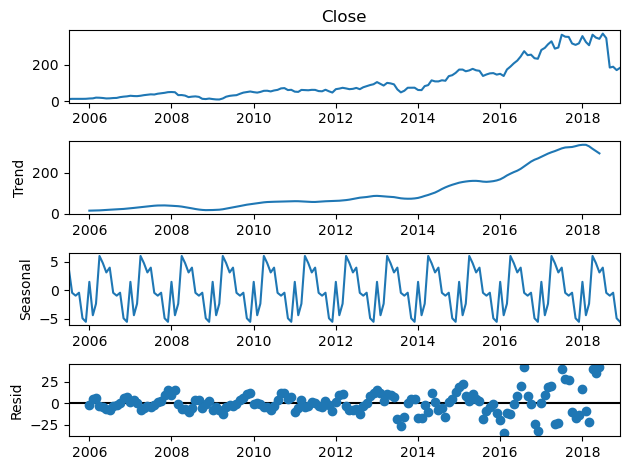

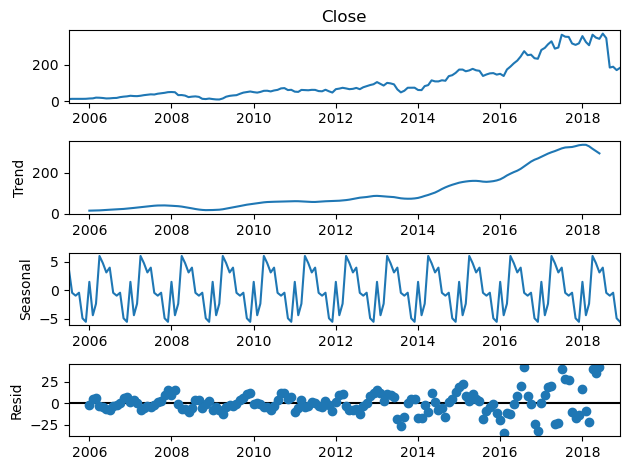

In [29]:
SD_Close_add.plot()

In [30]:
SD_Close_mul=seasonal_decompose(data['Close'],model='multiplicative')

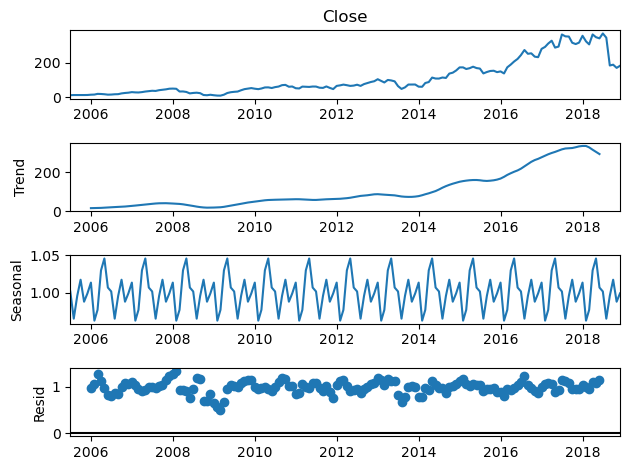

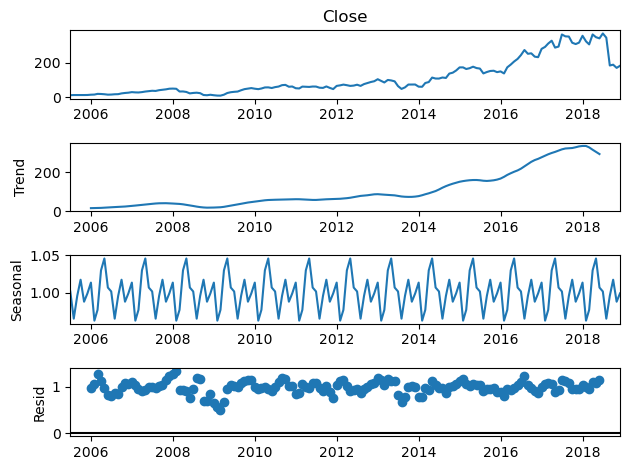

In [31]:
SD_Close_mul.plot()

#### Clearly Closing price demonstrates both positive average trend and seasonality that implies one might use SARIMAX models over ARIMA, AR, or MA models for prediction respectively

<AxesSubplot:xlabel='Date'>

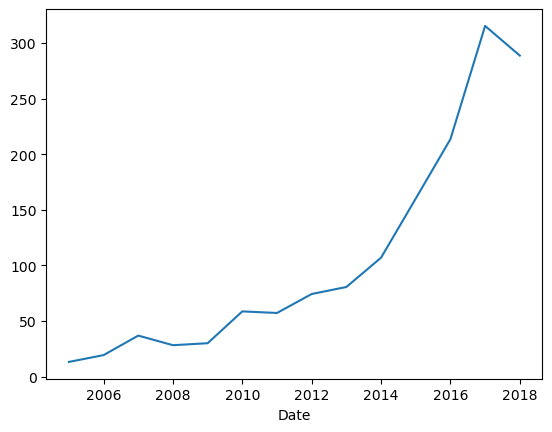

In [32]:
data.groupby(data.index.year).mean().Close.plot()


##### Finally from the plot of yearwise average it is quite evident that average is rising with few dips and dumbs and falling drasticallty after 2018 but still positive implies overall average will be still be away 0, We finally calculate the mean of Closing price column respectively

In [33]:
data['Close'].mean()

109.36148148148149

Checking for stationarity of Return column

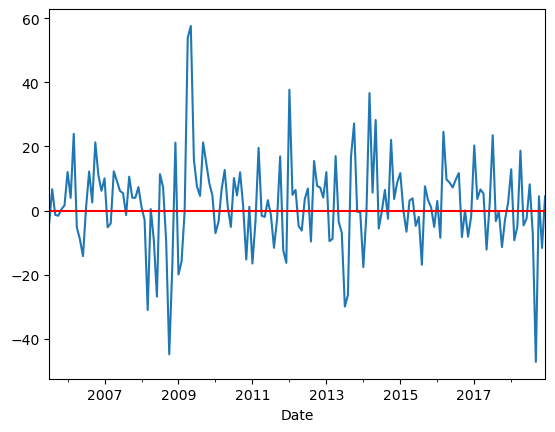

In [34]:
data['return'].plot()
plt.axhline(y=0, color='r', linestyle='-', label='y=0')
#Here instead of plt.plot ,for plotting the horizontal line we use axhline or axis horizontal line respectively

#### Note clearly returns don't have a predictable trend which implies returns are not non-stationary, more random and might be uncorrelated over lag periods respectively

In [35]:
adfuller(data['return'])

(-8.979098587251332,
 7.393125798848979e-15,
 1,
 160,
 {'1%': -3.4718957209472654,
  '5%': -2.8797795410156253,
  '10%': -2.5764947265625},
 1199.3089417070375)

#### Clearly from the data above we reject the null hypothesis of non stationarity respectively which implies our returns is stationary over time respectively

#### The ACF and PACF plot of return columns 

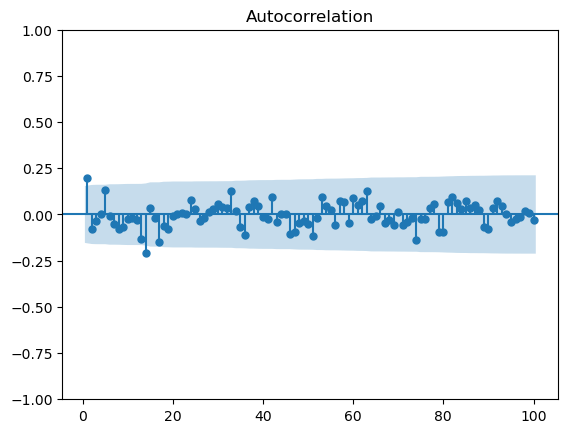

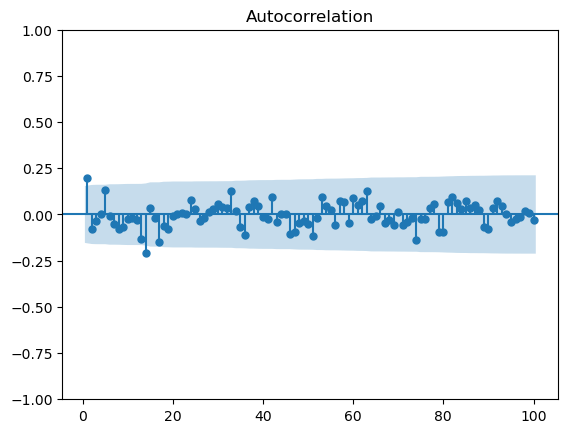

In [36]:
sgt.plot_acf(data['return'],lags=100,zero=False)

#### Clearly from the plot above we find past lags of any order are insignificant in terms of their correlation with their present value terms respectively which sends another indication why data is stationary respectively

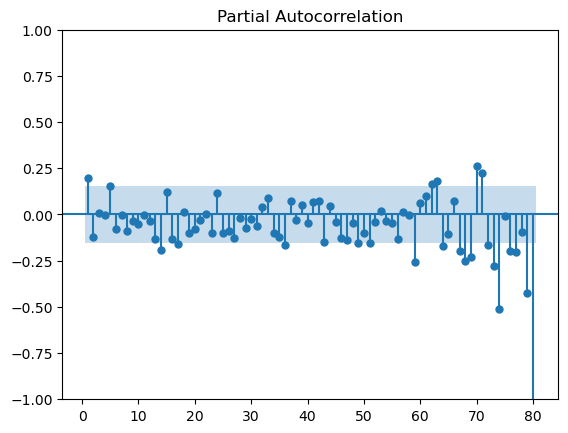

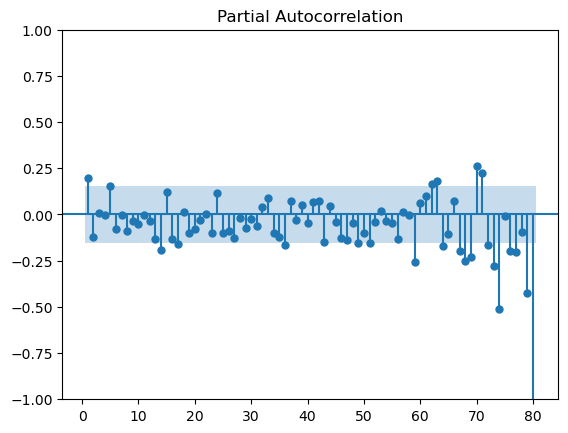

In [37]:
sgt.plot_pacf(data['return'],lags=80,zero=False,method="ols")

#### However from the pacf plot there does exist some significant correlation with the past values. Finally we check for seasonal decomposition

In [38]:
SD_Return_add= seasonal_decompose(data['return'],model="additive")

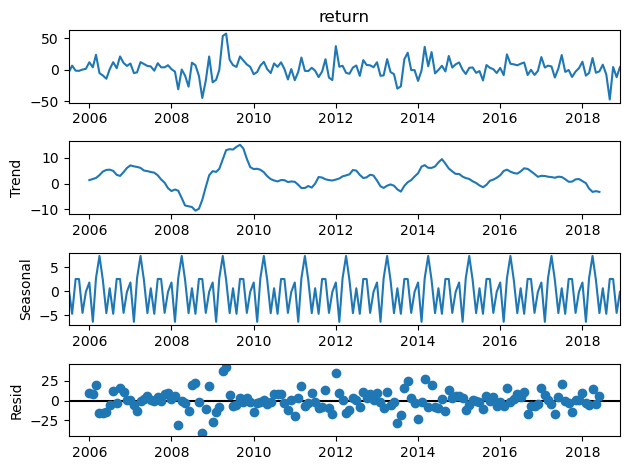

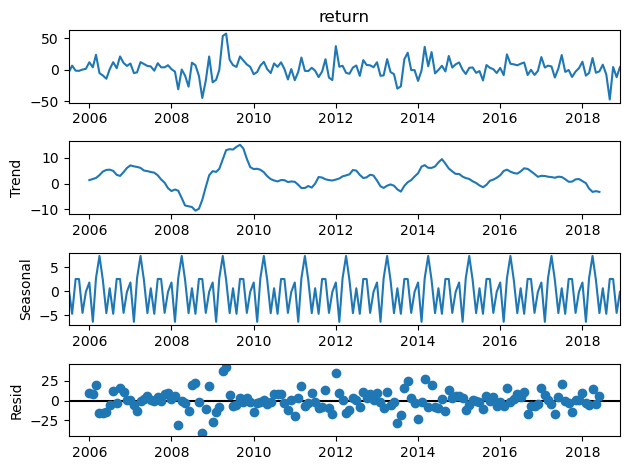

In [39]:
SD_Return_add.plot()

##### Note the trend is more or less around 0, so the data is stationary

### Conversion to stationary dataframe

#### Applying difference by difference method

In [40]:
data['Stat_Close']=data['Close'].diff(1)

In [41]:
adfuller(data['Stat_Close'][1:])

(-1.9448942173498691,
 0.31124490750939726,
 14,
 146,
 {'1%': -3.4759527332353084,
  '5%': -2.881548071241103,
  '10%': -2.577438765246763},
 1246.9160144139664)

##### Note after first order difference data is still not stationary , so we will use second order differencing to convert our data into stationarity

In [42]:
data['Stat_Close2']=data['Stat_Close'].diff(1)

In [43]:
adfuller(data['Stat_Close2'][2:])

(-4.372615173685431,
 0.00033176794830344533,
 13,
 146,
 {'1%': -3.4759527332353084,
  '5%': -2.881548071241103,
  '10%': -2.577438765246763},
 1241.72837796568)

#### Clearly our data is now stationary and we can use the second order difference equation for our time Series Prediction

<AxesSubplot:xlabel='Date'>

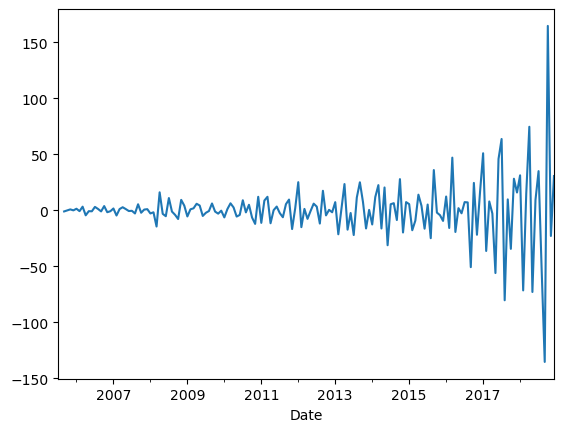

In [44]:
data['Stat_Close2'].plot()

#### Log differencing

In [45]:
data['Log_Close']=np.log(data['Close']).diff(1)

In [46]:
adfuller(data['Log_Close'][1:])

(-9.071682206201924,
 4.2853145345575226e-15,
 1,
 159,
 {'1%': -3.472161410886292,
  '5%': -2.8798954259680936,
  '10%': -2.5765565828092245},
 -150.49739754596732)

<AxesSubplot:xlabel='Date'>

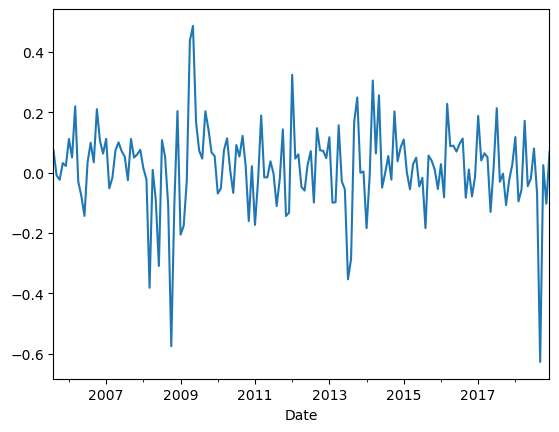

In [47]:
data['Log_Close'][1:].plot()

#### Hence with Log differencing our data is stationary for every level of significance however we lose 1 period of observation

In [48]:
data.shape

(162, 8)

Text(0.5, 1.0, 'Stock Prices detrended by subtracting the trend component')

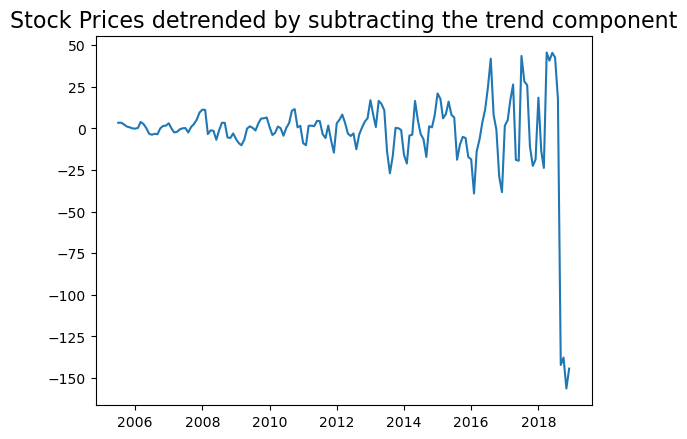

In [49]:
# Using statmodels: Subtracting the Trend Component.
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(data['Close'], extrapolate_trend='freq')
detrended = data.Close.values - res.trend
plt.plot(detrended)
plt.title('Stock Prices detrended by subtracting the trend component', fontsize=16)

In [50]:
adfuller(detrended)

(-3.037977023020343,
 0.03149683035163313,
 14,
 147,
 {'1%': -3.4756368462466662,
  '5%': -2.8814104466172608,
  '10%': -2.5773652982553568},
 1231.4261394846924)

In [51]:
data['detrended']=pd.DataFrame(detrended)

##### With linear detrending our data though significantly stationary at 5% level of significance is not that significance at 1% one, however the advantage of time Series differencing over Log differencing is with time series differencing, we don't lose out the first observation respectively 

<AxesSubplot:xlabel='Date'>

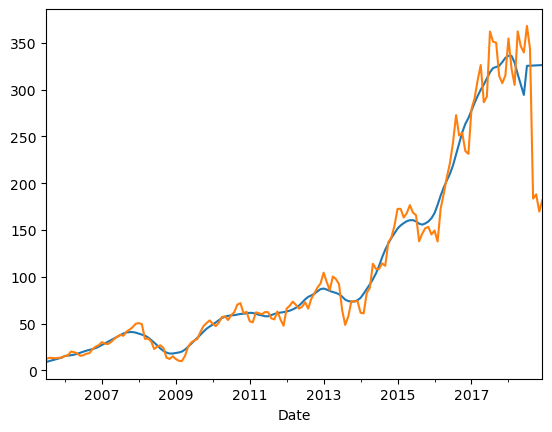

In [52]:
res.trend.plot()
data.Close.plot()

<AxesSubplot:xlabel='Date'>

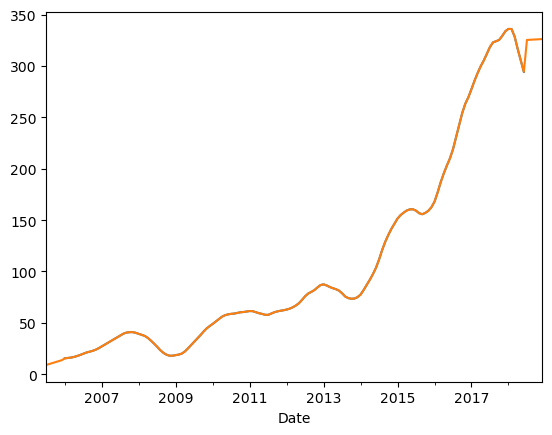

In [53]:
SD_Close_add.trend.plot()
res.trend.plot()

### Prediction

#### Here we do 2 predictions
##### 1)Till 2017 data will be collected and we will use it to predict the stock prices from 2018-2019 and 2019-2020
##### 2)Till 2018, data will be collected and and predictions of 2019-2020 will be done in order to predict 2019-2020 and difference in predictions will be taken into account for capturing the distortion due to scam respectively.
##### 3)Second prediction series will be compared with actual predictions of 2019-2020 respectively  

In [54]:
#### Creating the data with and without scam
scam_date="2018-01-01"
Prescam=data[:"2017-12-01"]
PostScam=data[scam_date:]

#### Before predicting Post Scam Date we use first find the best model of from training data set by creating a sub train test split in our Training data respectively

In [55]:
Prescam.shape

(150, 9)

In [56]:
# Set one year for testing
strain = detrended.iloc[:138]
stest = detrended.iloc[138:150]

In [57]:
strain

Date
2005-07-01     3.384393
2005-08-01     3.424186
2005-09-01     2.383979
2005-10-01     1.153772
2005-11-01     0.653565
                ...    
2016-08-01    41.855417
2016-09-01     8.070417
2016-10-01    -0.689583
2016-11-01   -28.987917
2016-12-01   -38.302083
Freq: MS, Name: trend, Length: 138, dtype: float64

In [58]:
stest

Date
2017-01-01     1.638333
2017-02-01     4.885417
2017-03-01    16.739583
2017-04-01    26.393750
2017-05-01   -18.922500
2017-06-01   -19.445417
2017-07-01    43.513750
2017-08-01    28.243750
2017-09-01    25.978333
2017-10-01   -10.962917
2017-11-01   -22.501667
2017-12-01   -18.712083
Freq: MS, Name: trend, dtype: float64

### Checking the acf and pacf plot to determine the optimum order of lag

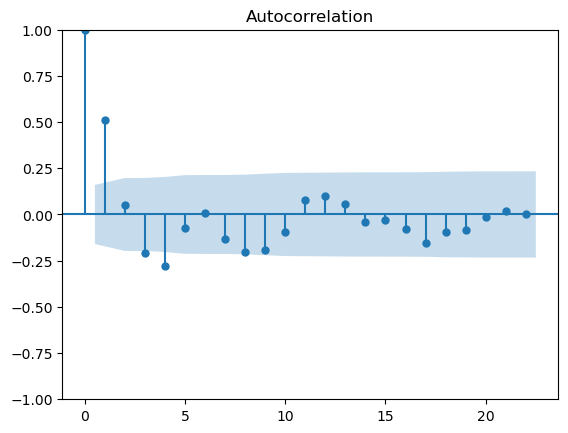

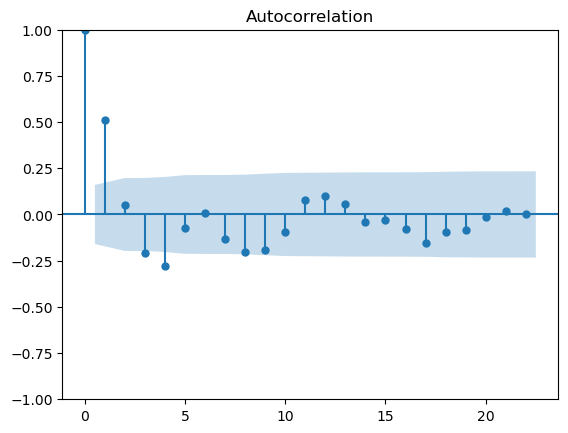

In [59]:
sgt.plot_acf(Prescam['detrended'])

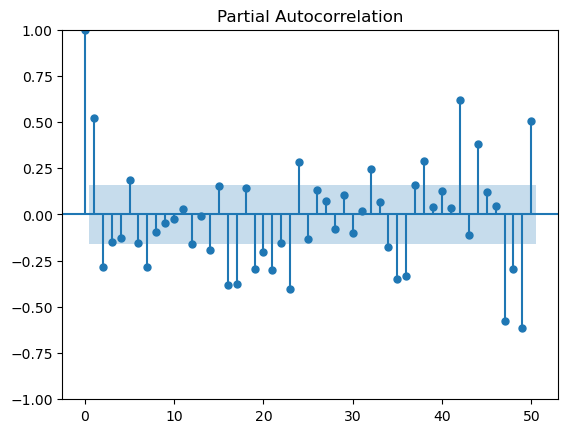

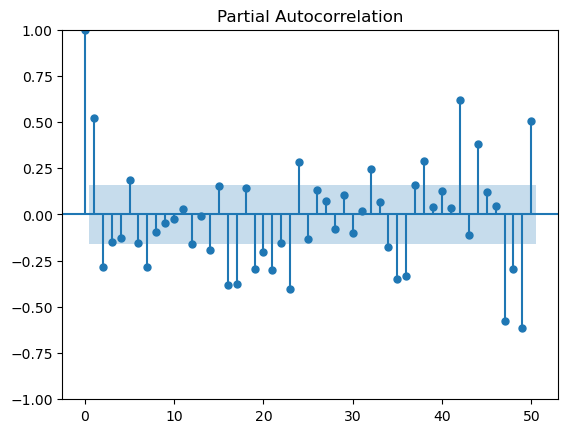

In [60]:
sgt.plot_pacf(Prescam['detrended'],method="ols",lags=50)

#### From the ACF plot it is quiet evident that lags till order 4 are quite significant so we start with an initial guess of order 4 of MA process, however with PACF plot almost all lags is significant however due to risk of severe overfitting , we might just start with MA(4) and AR(4) model 

### Prediction using ARMA(4,4) model

In [61]:
ARMA44=ARIMA(Prescam['detrended'],order=(4,0,4))

In [62]:
ar44=ARMA44.fit()

In [63]:
ar44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              detrended   No. Observations:                  150
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -538.099
Date:                Thu, 21 Sep 2023   AIC                           1096.198
Time:                        22:07:09   BIC                           1126.304
Sample:                    07-01-2005   HQIC                          1108.429
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2005      0.106     -1.901      0.057      -0.407       0.006
ar.L1          1.4040      0.134     10.451      0.000       1.141       1.667
ar.L2         -1.3491      0.219     -6.154      0.000      -1.779      -0.919
ar.L3          0.7453      0.216      3.456      0.001       0.323       1.168
ar.L4         -0.0908      0.131     -0.692      0.489      -0.348       0.166
ma.L1         -0.9106      2.546     -0.358      0.721      -5.901       4.080
ma.L2          0.7311      0.460      1.590      0.112      -0.170       1.632
ma.L3         -0.3565      2.077     -0.172      0.864      -4.427       3.714
ma.L4         -0.4636      1.189     -0.390      0.697      -2.794       1.867
sigma2        72.2567    184.595      0.391      0.695    -289.542     434.056
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               119.81
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              15.94   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
AR44_predict=ar44.predict(start="2017-01-01",end="2017-12-01")

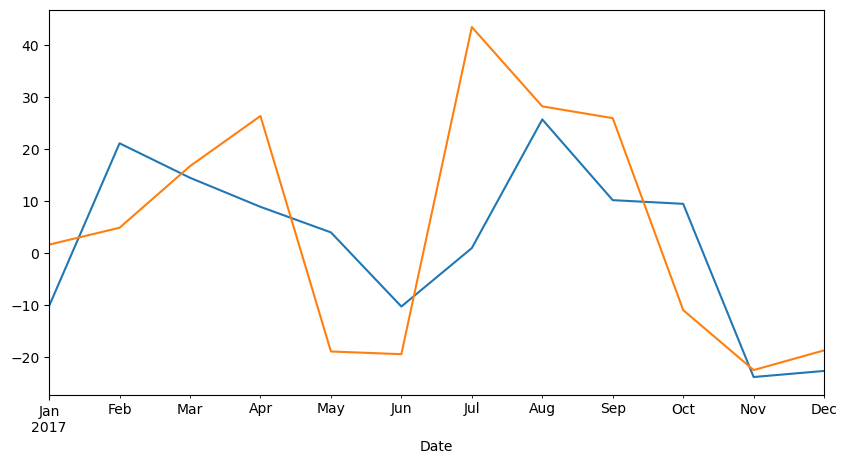

In [65]:
fig,axes=plt.subplots(figsize=(10,5))
AR44_predict.plot()
stest.plot()
plt.show()

In [66]:
for i in range(0,len(AR44_predict)):
    print(f"predicted={AR44_predict[i]}, expected={stest[i]}")

predicted=-10.179190826650526, expected=1.638333333333378
predicted=21.13977442176132, expected=4.885416666666629
predicted=14.504359972885476, expected=16.739583333333314
predicted=8.911895270085816, expected=26.393749999999955
predicted=3.994258899118572, expected=-18.922500000000014
predicted=-10.271453763064471, expected=-19.445416666666688
predicted=0.9753824352524598, expected=43.513750000000016
predicted=25.729742462881088, expected=28.243750000000034
predicted=10.19662477671564, expected=25.978333333333353
predicted=9.48892682690537, expected=-10.962916666666615
predicted=-23.839299477012666, expected=-22.501666666666665
predicted=-22.66721874187281, expected=-18.71208333333334


In [67]:
error = mean_squared_error(stest,AR44_predict)
print(f'ARMA(4,4) MSE Error: {error:11.10}')

ARMA(4,4) MSE Error: 318.7012049


In [68]:
Error_AR44=stest-AR44_predict

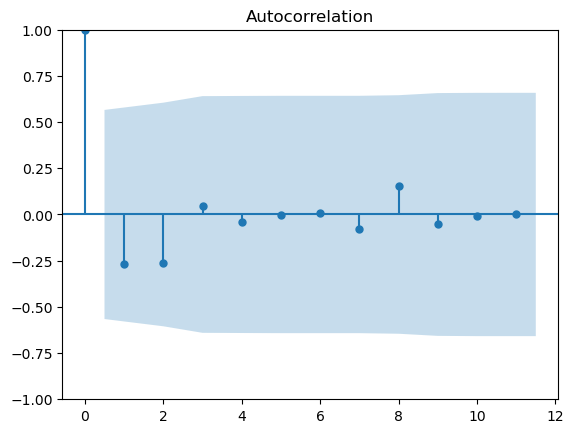

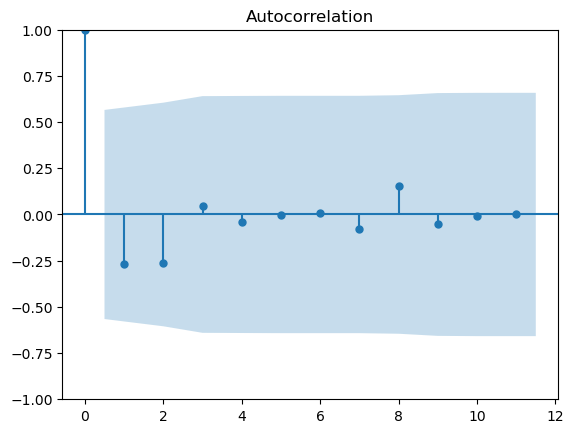

In [69]:
sgt.plot_acf(Error_AR44)

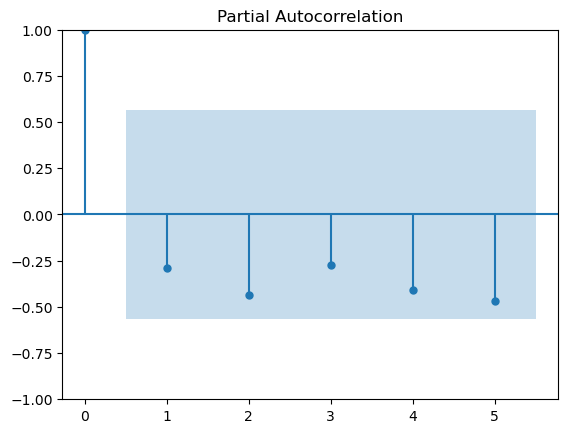

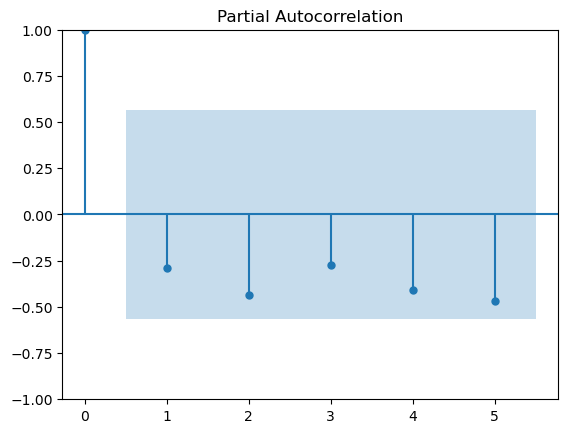

In [70]:
sgt.plot_pacf(Error_AR44,lags=5)

### Though the acf plot shows white noise errors using both pacf and acf plots respectively

#### Note all ar4, and all ma terms have been found to be insignificant so we revise our model with ar 3 terms 

#### AR(3)

In [71]:
AR3=ARIMA(Prescam['detrended'],order=(5,0,0))

In [72]:
ar3=AR3.fit()

In [73]:
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              detrended   No. Observations:                  150
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -549.280
Date:                Thu, 21 Sep 2023   AIC                           1112.561
Time:                        22:07:10   BIC                           1133.635
Sample:                    07-01-2005   HQIC                          1121.123
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      1.474      0.010      0.992      -2.875       2.904
ar.L1          0.6203      0.110      5.663      0.000       0.406       0.835
ar.L2         -0.1961      0.126     -1.563      0.118      -0.442       0.050
ar.L3         -0.0398      0.067     -0.596      0.551      -0.171       0.091
ar.L4         -0.2279      0.081     -2.815      0.005      -0.387      -0.069
ar.L5          0.1785      0.067      2.664      0.008       0.047       0.310
sigma2        88.2988      6.563     13.454      0.000      75.435     101.162
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               492.64
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              19.55   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
AR3_predict=ar3.predict(start="2017-01-01",end="2017-12-01")

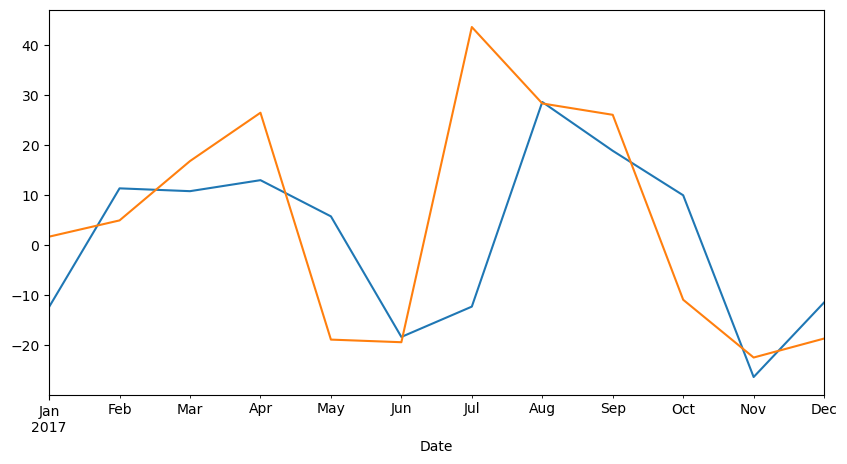

In [75]:
fig,axes=plt.subplots(figsize=(10,5))
AR3_predict.plot()
stest.plot()
plt.show()

In [76]:
for i in range(0,len(AR3_predict)):
    print(f"predicted={AR3_predict[i]}, expected={stest[i]}")

predicted=-12.402726573543468, expected=1.638333333333378
predicted=11.289544741330356, expected=4.885416666666629
predicted=10.726376499530312, expected=16.739583333333314
predicted=12.923544829821878, expected=26.393749999999955
predicted=5.692692859924323, expected=-18.922500000000014
predicted=-18.390899881119275, expected=-19.445416666666688
predicted=-12.333780775666007, expected=43.513750000000016
predicted=28.539092362491967, expected=28.243750000000034
predicted=18.791238602599076, expected=25.978333333333353
predicted=9.904935799986623, expected=-10.962916666666615
predicted=-26.396954524773623, expected=-22.501666666666665
predicted=-11.50071322040366, expected=-18.71208333333334


In [77]:
error = mean_squared_error(stest,AR3_predict)
print(f'ARMA(3) MSE Error: {error:11.10}')

ARMA(3) MSE Error: 394.6768061


In [78]:
Error_AR3=stest-AR3_predict

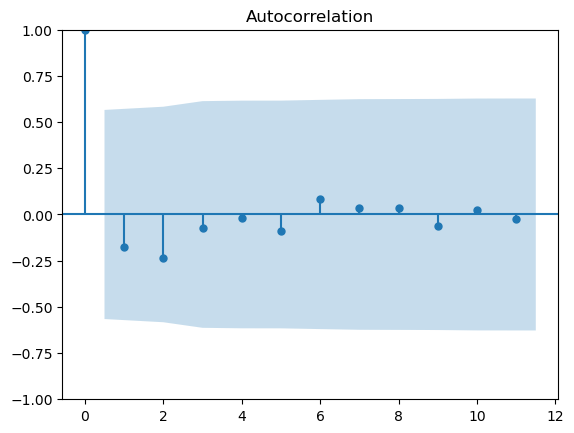

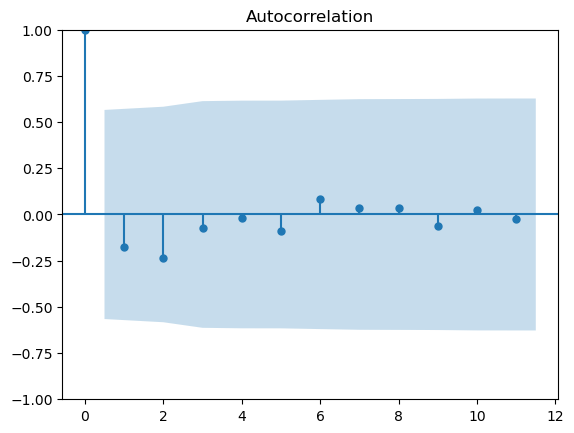

In [79]:
sgt.plot_acf(Error_AR3)

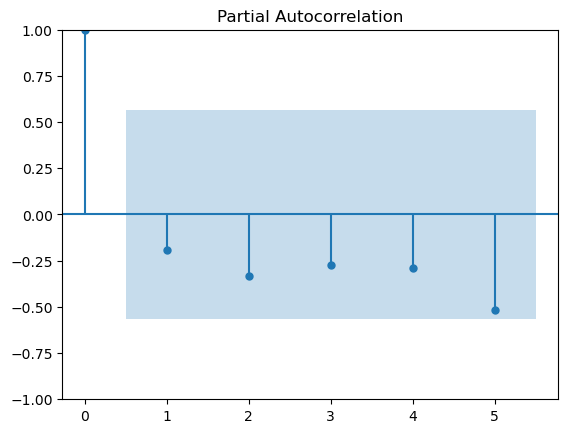

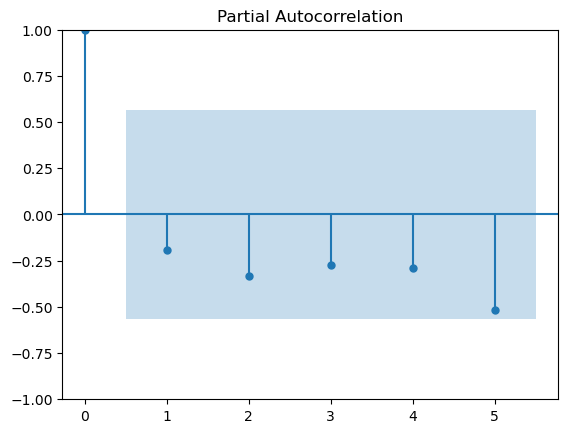

In [80]:
sgt.plot_pacf(Error_AR3,lags=5)

#### SARIMA Model

In [81]:
Sarima=auto_arima(Prescam['detrended'],
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=2,
    D=1,
    start_Q=2,
    max_P=None,
    max_D=2,
    max_Q=None,
    max_order=None,
    m=12,
    seasonal=True,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [82]:
Sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(7, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -538.310
Date:                            Thu, 21 Sep 2023   AIC                           1094.619
Time:                                    22:08:08   BIC                           1120.833
Sample:                                07-01-2005   HQIC                          1105.272
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9337      0.082    -11.362      0.000      -1.095      -0.773
ar.L2         -0.9474      0.064    -14.804      0.000      -1.073      -0.822
ar.L3         -0.9825      0.085    -11.498      0.000      -1.150      -0.815
ar.L4         -1.0130      0.082    -12.347      0.000      -1.174      -0.852
ar.L5         -0.6210      0.096     -6.464      0.000      -0.809      -0.433
ar.L6         -0.3791      0.089     -4.250      0.000      -0.554      -0.204
ar.L7         -0.1964      0.079     -2.498      0.013      -0.351      -0.042
ar.S.L12      -0.5622      0.090     -6.252      0.000      -0.738      -0.386
sigma2       152.5750     15.150     10.071      0.000     122.881     182.269
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                34.12
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              13.20   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
Sarima_model = SARIMAX(Prescam['detrended'], 
                order = (7, 2, 0),seasonal_order=(1,1,0,12))
  
Sarima_result = Sarima_model.fit(maxiter=200)
Sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          detrended   No. Observations:                  150
Model:             SARIMAX(7, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -538.310
Date:                            Thu, 21 Sep 2023   AIC                           1094.619
Time:                                    22:08:09   BIC                           1120.833
Sample:                                07-01-2005   HQIC                          1105.272
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9337      0.082    -11.362      0.000      -1.095      -0.773
ar.L2         -0.9474      0.064    -14.804      0.000      -1.073      -0.822
ar.L3         -0.9825      0.085    -11.498      0.000      -1.150      -0.815
ar.L4         -1.0130      0.082    -12.347      0.000      -1.174      -0.852
ar.L5         -0.6210      0.096     -6.464      0.000      -0.809      -0.433
ar.L6         -0.3791      0.089     -4.250      0.000      -0.554      -0.204
ar.L7         -0.1964      0.079     -2.498      0.013      -0.351      -0.042
ar.S.L12      -0.5622      0.090     -6.252      0.000      -0.738      -0.386
sigma2       152.5750     15.150     10.071      0.000     122.881     182.269
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                34.12
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              13.20   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
sstart="2017-01-01"
send="2017-12-01"

In [85]:
Prescam

,Open,High,Low,Close,return,Stat_Close,Stat_Close2,Log_Close,detrended
Date,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-4.153846,NaN,NaN,NaN,3.384393
2005-08-01,12.58,14.88,12.55,13.42,6.677266,0.96,NaN,0.074223,3.424186
2005-09-01,13.48,14.87,12.27,13.30,-1.335312,-0.12,-1.08,-0.008982,2.383979
2005-10-01,13.20,14.47,12.40,12.99,-1.590909,-0.31,-0.19,-0.023584,1.153772
2005-11-01,13.35,13.88,12.88,13.41,0.449438,0.42,0.73,0.031821,0.653565
...,...,...,...,...,...,...,...,...,...
2017-08-01,363.00,368.52,337.37,351.15,-3.264463,-10.81,-80.40,-0.030320,28.243750
2017-09-01,351.00,383.25,345.50,350.00,-0.284900,-1.15,9.66,-0.003280,25.978333
2017-10-01,354.60,375.75,299.00,314.35,-11.350818,-35.65,-34.50,-0.107426,-10.962917


In [86]:
SARIMAPredictions=Sarima_result.predict(start=sstart,end=send)

<AxesSubplot:xlabel='Date'>

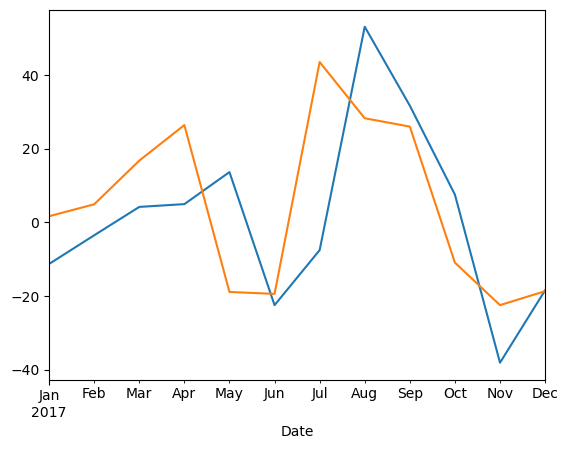

In [87]:
SARIMAPredictions.plot()
stest.plot()

In [88]:
error = mean_squared_error(stest, SARIMAPredictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 480.9382825


#### As one can see using SARIMA model offers a huge improvement over normal AR(2) model as not only it takes account of seasonality and higher order error lags that is not only includes the MA part but also each coefficient has been significant respectively

In [89]:
WN_Error=SARIMAPredictions-stest

<AxesSubplot:xlabel='Date'>

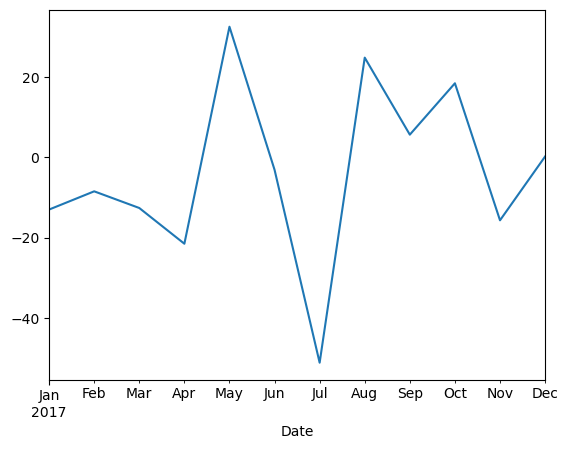

In [90]:
WN_Error.plot()

In [91]:
adfuller(WN_Error)

(-3.424969926172466,
 0.010136535857180617,
 1,
 10,
 {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487},
 67.03120067064664)

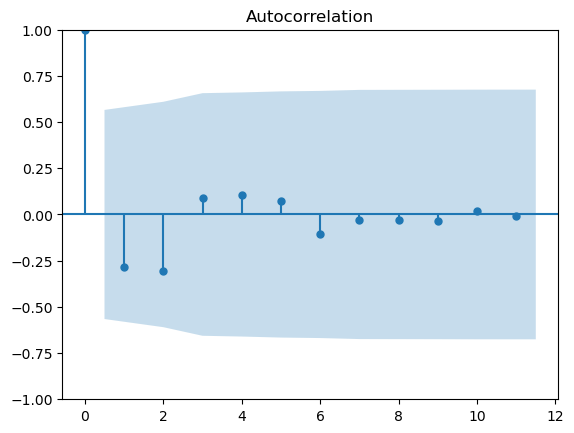

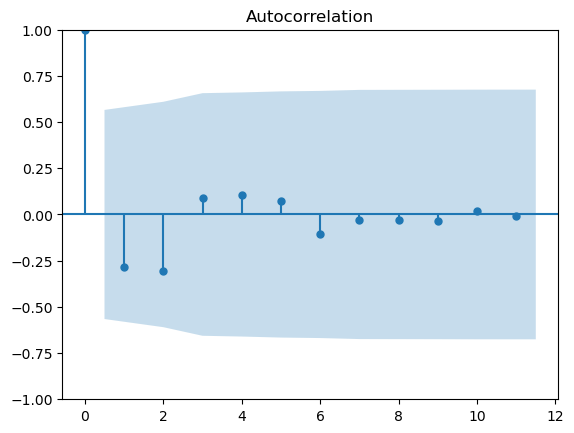

In [92]:
sgt.plot_acf(WN_Error)

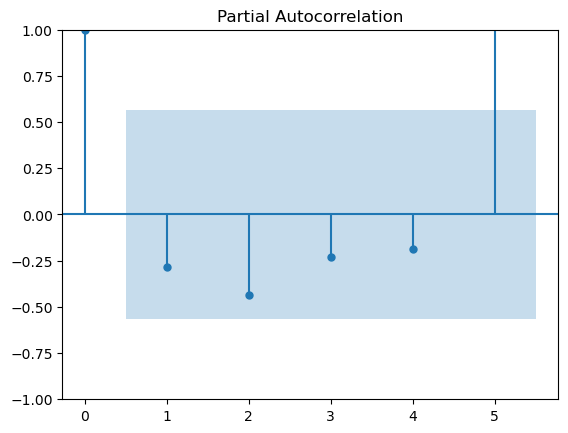

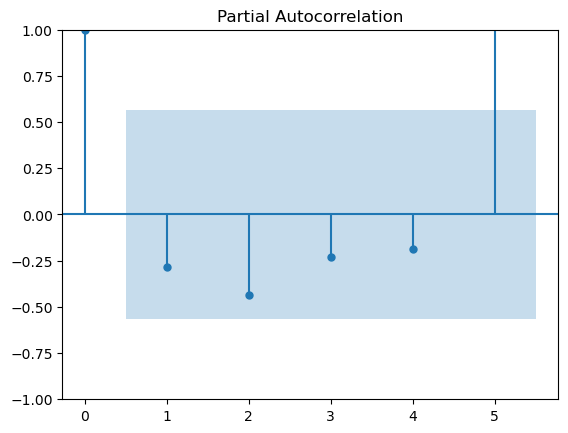

In [93]:
sgt.plot_pacf(WN_Error,method='ols',lags=5)

### With Exogenous factors

In [94]:
Auto_Arima=auto_arima(Prescam['detrended'],X=Prescam[['Open','High','Low']],
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=1,
    D=1,
    start_Q=1,
    max_P=None,
    max_D=2,
    max_Q=None,
    max_order=None,
    m=12,
    seasonal=True,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [95]:
Auto_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  150
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -441.863
Date:                              Thu, 21 Sep 2023   AIC                            901.725
Time:                                      22:09:28   BIC                            927.939
Sample:                                  07-01-2005   HQIC                           912.378
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6950      0.048    -14.336      0.000      -0.790      -0.600
High           0.7631      0.044     17.411      0.000       0.677       0.849
Low            0.7728      0.058     13.398      0.000       0.660       0.886
ar.L1          0.4157      0.102      4.068      0.000       0.215       0.616
ma.L1         -1.7325      0.043    -40.068      0.000      -1.817      -1.648
ma.L2          0.9131      0.043     21.292      0.000       0.829       0.997
ar.S.L12      -0.2357      0.130     -1.810      0.070      -0.491       0.020
ma.S.L12      -0.7167      0.104     -6.877      0.000      -0.921      -0.512
sigma2        34.1112      3.687      9.251      0.000      26.884      41.338
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                15.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               5.31   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(Prescam['detrended'],exog=Prescam[['Open','High','Low']], 
                order = (1, 2, 2),seasonal_order=(1,1,1,12))
  
result = model.fit(maxiter=200)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            detrended   No. Observations:                  150
Model:             SARIMAX(1, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -441.863
Date:                              Thu, 21 Sep 2023   AIC                            901.725
Time:                                      22:09:30   BIC                            927.939
Sample:                                  07-01-2005   HQIC                           912.378
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6950      0.048    -14.336      0.000      -0.790      -0.600
High           0.7631      0.044     17.411      0.000       0.677       0.849
Low            0.7728      0.058     13.398      0.000       0.660       0.886
ar.L1          0.4157      0.102      4.068      0.000       0.215       0.616
ma.L1         -1.7325      0.043    -40.068      0.000      -1.817      -1.648
ma.L2          0.9131      0.043     21.292      0.000       0.829       0.997
ar.S.L12      -0.2357      0.130     -1.810      0.070      -0.491       0.020
ma.S.L12      -0.7167      0.104     -6.877      0.000      -0.921      -0.512
sigma2        34.1112      3.687      9.251      0.000      26.884      41.338
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                15.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               5.31   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
Predictions=result.predict(start=sstart,end=send)

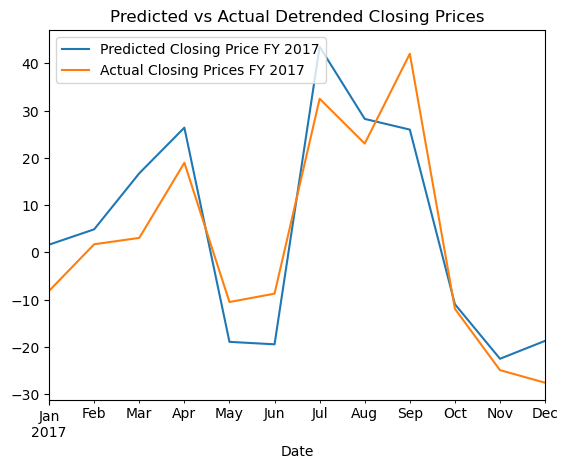

In [98]:
stest.plot(title="Predicted vs Actual Detrended Closing Prices")
Predictions.plot()
plt.legend(["Predicted Closing Price FY 2017","Actual Closing Prices FY 2017"],loc = "upper left")

In [99]:
error = mean_squared_error(stest, Predictions)
print(f'SARIMAX MSE Error: {error:11.10}')

SARIMAX MSE Error: 85.36881355


#### As one can see we have not only a good prediction but also have a very low RMSE error as well, however this might imply some cause of overfitting as well

In [100]:
res.trend

Date
2005-07-01      9.075607
2005-08-01      9.995814
2005-09-01     10.916021
2005-10-01     11.836228
2005-11-01     12.756435
                 ...    
2018-08-01    325.425358
2018-09-01    325.593210
2018-10-01    325.761063
2018-11-01    325.928916
2018-12-01    326.096768
Freq: MS, Name: trend, Length: 162, dtype: float64

<AxesSubplot:title={'center':'Time Trend of Closing Prices'}, xlabel='Date'>

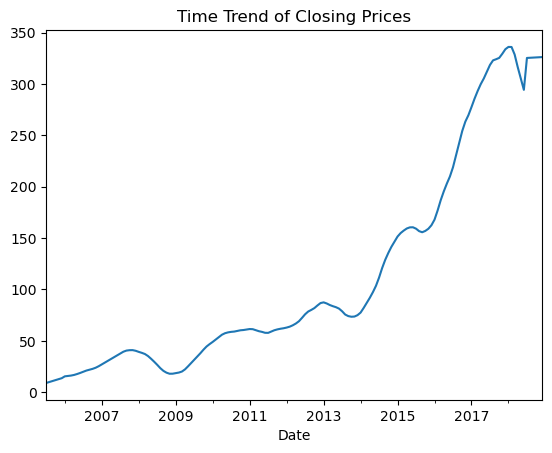

In [101]:
res.trend.plot(title="Time Trend of Closing Prices")

In [102]:
trendy = pd.DataFrame(res.trend)[:"2017-12-01"]

<AxesSubplot:xlabel='Date'>

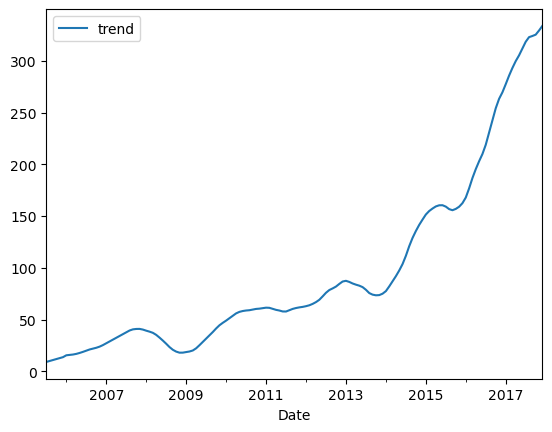

In [103]:
trendy.plot()

In [104]:
# Set one year for testing
traint = trendy.iloc[:138]
testt = trendy.iloc[138:150]

In [105]:
Trend_Arima=auto_arima(trendy,
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=1,
    D=1,
    start_Q=1,
    max_P=None,
    max_D=2,
    max_Q=None,
    max_order=None,
    seasonal=False,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [106]:
Trend_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(4, 2, 3)   Log Likelihood                -162.702
Date:                Thu, 21 Sep 2023   AIC                            341.404
Time:                        22:09:39   BIC                            365.382
Sample:                    07-01-2005   HQIC                           351.146
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.095      3.420      0.001       0.138       0.509
ar.L2         -0.5290      0.102     -5.191      0.000      -0.729      -0.329
ar.L3         -0.4582      0.092     -5.000      0.000      -0.638      -0.279
ar.L4          0.2597      0.086      3.025      0.002       0.091       0.428
ma.L1          0.4350      0.092      4.752      0.000       0.256       0.614
ma.L2          0.3542      0.097      3.656      0.000       0.164       0.544
ma.L3          0.8343      0.086      9.714      0.000       0.666       1.003
sigma2         0.5154      0.058      8.821      0.000       0.401       0.630
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.82   Prob(JB):                         0.12
Heteroskedasticity (H):               3.45   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
modelt = SARIMAX(trendy['trend'],order=(4,2,3))
resultst = modelt.fit(maxiter=200)
resultst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(4, 2, 3)   Log Likelihood                -162.702
Date:                Thu, 21 Sep 2023   AIC                            341.404
Time:                        22:09:40   BIC                            365.382
Sample:                    07-01-2005   HQIC                           351.146
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.095      3.420      0.001       0.138       0.509
ar.L2         -0.5290      0.102     -5.191      0.000      -0.729      -0.329
ar.L3         -0.4582      0.092     -5.000      0.000      -0.638      -0.279
ar.L4          0.2597      0.086      3.025      0.002       0.091       0.428
ma.L1          0.4350      0.092      4.752      0.000       0.256       0.614
ma.L2          0.3542      0.097      3.656      0.000       0.164       0.544
ma.L3          0.8343      0.086      9.714      0.000       0.666       1.003
sigma2         0.5154      0.058      8.821      0.000       0.401       0.630
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.82   Prob(JB):                         0.12
Heteroskedasticity (H):               3.45   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
# Obtain predicted values
start=len(traint)
end=len(traint)+len(testt)-1
predictionst = resultst.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions')

In [109]:
# Compare predictions to expected values
for i in range(len(predictionst)):
    print(f"predicted={predictionst[i]:<11.10}, expected={testt['trend'][i]}")

predicted=275.4102271, expected=277.46166666666664
predicted=286.6815731, expected=285.6745833333334
predicted=292.5177727, expected=293.0804166666667
predicted=300.2057071, expected=299.74625000000003
predicted=306.0323872, expected=305.3025
predicted=311.3316702, expected=311.8154166666667
predicted=318.9227421, expected=318.44624999999996
predicted=324.2805096, expected=322.90624999999994
predicted=325.5124388, expected=324.02166666666665
predicted=323.8655108, expected=325.31291666666664
predicted=328.4106331, expected=329.3016666666667
predicted=334.6949759, expected=333.76208333333335


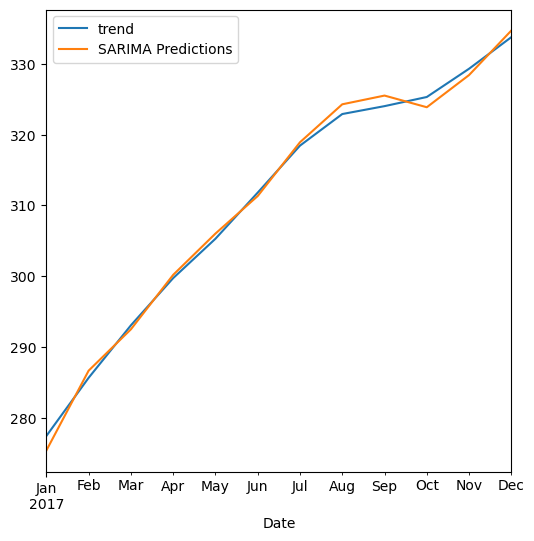

In [110]:
ax = testt['trend'].plot(legend=True,figsize=(6,6))
predictionst.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [111]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testt['trend'], predictionst)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 1.217841365


#### Clearly using SARIMAX model we can predict trend with a very little RSE , we could have used linear regression model but owing to the concavity and convexity trend displays over ranges of time , SARIMAX did a better prediction. Once both trend component and seasonality + random compoenent were predicted for 2017 They were added together and compared with the original 2017 values

In [112]:
finalpreds = (predictionst + Predictions)

<AxesSubplot:xlabel='Date'>

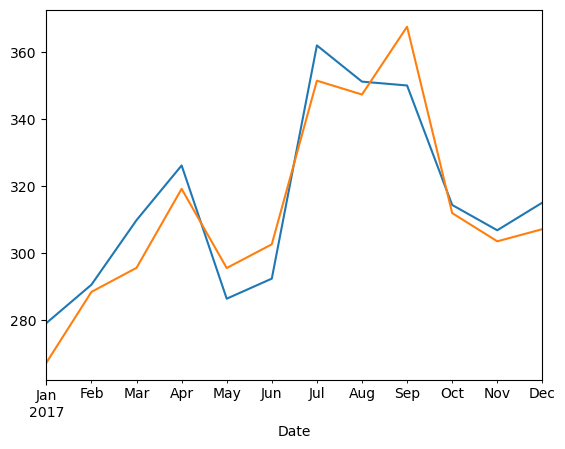

In [113]:
data["2017-01-01":"2017-12-01"]['Close'].plot()
finalpreds.plot()

In [114]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(data["2017-01-01":"2017-12-01"]['Close'], finalpreds)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 91.40314326


#### We now use our previous SARIMA model to predict 2018 data

#### Since till 2017 data we did not have a scam and hence we use this data to forecast stock prices from year 2018 which we call as prediction without scam

In [115]:
Predictions_NoScam=Sarima_result.forecast(steps=36)

<AxesSubplot:>

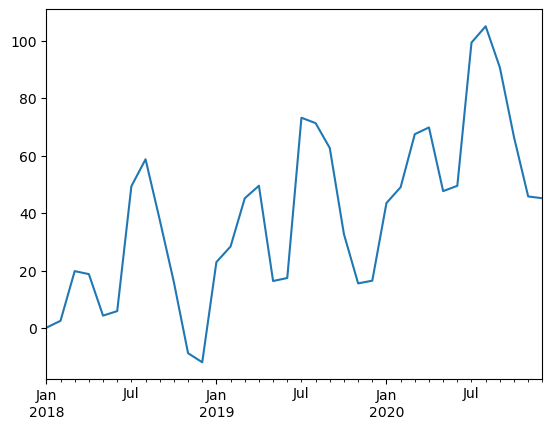

In [116]:
Predictions_NoScam.plot()

##### Predictions for time component from 2018 onwards

In [117]:
resultst_NoScam=resultst.forecast(steps=36, dynamic=False, typ='levels', full_results = True)

In [118]:
No_Scam=Predictions_NoScam+resultst_NoScam

<AxesSubplot:xlabel='Date'>

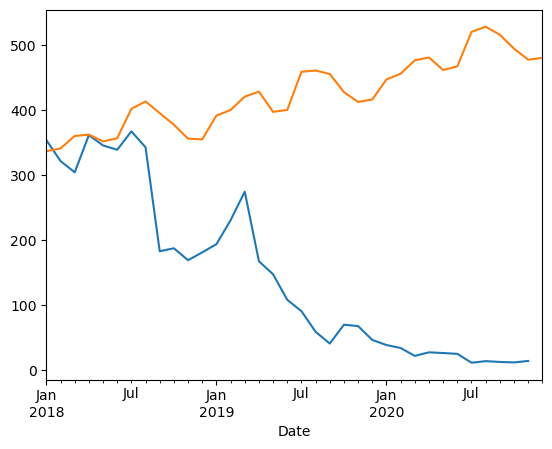

In [119]:
Yes['Close']['2018-01-01':].plot()
No_Scam.plot()

In [120]:
Unantipated=No_Scam-Yes['Close']['2018-01-01':]

<AxesSubplot:>

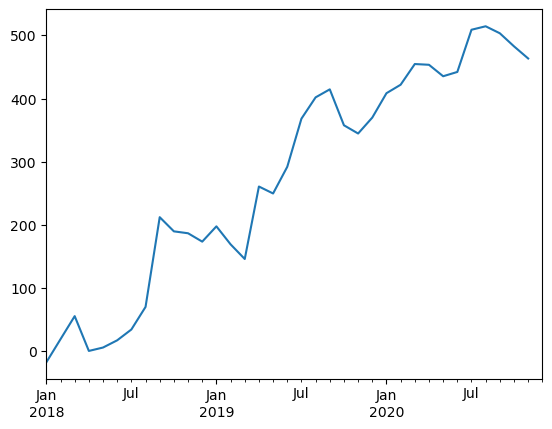

In [121]:
Unantipated.plot()

##### Fianlly we are going to predict the same incorporating 2018 into effect 

In [122]:
Sarima_Scam=auto_arima(data['detrended'],
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=2,
    D=1,
    start_Q=2,
    max_P=None,
    max_D=2,
    max_Q=None,
    max_order=None,
    m=12,
    seasonal=True,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [123]:
Sarima_Scam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  162
Model:             SARIMAX(6, 2, 1)x(1, 1, [], 12)   Log Likelihood                -638.529
Date:                             Thu, 21 Sep 2023   AIC                           1295.057
Time:                                     22:10:54   BIC                           1322.032
Sample:                                 07-01-2005   HQIC                          1306.017
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0329      0.159     -0.207      0.836      -0.345       0.280
ar.L2         -0.0913      0.178     -0.513      0.608      -0.440       0.257
ar.L3         -0.2061      0.177     -1.164      0.244      -0.553       0.141
ar.L4         -0.1355      0.151     -0.896      0.370      -0.432       0.161
ar.L5         -0.0964      0.142     -0.681      0.496      -0.374       0.181
ar.L6          0.1755      0.136      1.288      0.198      -0.092       0.443
ma.L1         -0.9765      0.200     -4.876      0.000      -1.369      -0.584
ar.S.L12      -0.6554      0.111     -5.907      0.000      -0.873      -0.438
sigma2       303.0924     23.466     12.916      0.000     257.100     349.084
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2736.85
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              39.52   Skew:                            -2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
Sarima_Scam_model = SARIMAX(data['detrended'], 
                order = (6, 2, 1),seasonal_order=(1,1,0,12))
  
Sarima_Scam_result = Sarima_Scam_model.fit(maxiter=200)
Sarima_Scam_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           detrended   No. Observations:                  162
Model:             SARIMAX(6, 2, 1)x(1, 1, [], 12)   Log Likelihood                -638.529
Date:                             Thu, 21 Sep 2023   AIC                           1295.057
Time:                                     22:10:55   BIC                           1322.032
Sample:                                 07-01-2005   HQIC                          1306.017
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0329      0.159     -0.207      0.836      -0.345       0.280
ar.L2         -0.0913      0.178     -0.513      0.608      -0.440       0.257
ar.L3         -0.2061      0.177     -1.164      0.244      -0.553       0.141
ar.L4         -0.1355      0.151     -0.896      0.370      -0.432       0.161
ar.L5         -0.0964      0.142     -0.681      0.496      -0.374       0.181
ar.L6          0.1755      0.136      1.288      0.198      -0.092       0.443
ma.L1         -0.9765      0.200     -4.876      0.000      -1.369      -0.584
ar.S.L12      -0.6554      0.111     -5.907      0.000      -0.873      -0.438
sigma2       303.0924     23.466     12.916      0.000     257.100     349.084
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2736.85
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              39.52   Skew:                            -2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
Predictions_Scam=Sarima_Scam_result.forecast(steps=24)

In [126]:
Predictions_Scam

2019-01-01    -99.131705
2019-02-01   -109.783721
2019-03-01   -140.165804
2019-04-01   -112.444387
2019-05-01   -145.875869
2019-06-01   -138.490052
2019-07-01    -95.611290
2019-08-01   -114.847797
2019-09-01   -182.432411
2019-10-01   -210.180983
2019-11-01   -228.014605
2019-12-01   -221.542072
2020-01-01   -182.078523
2020-02-01   -208.257334
2020-03-01   -230.015605
2020-04-01   -179.009355
2020-05-01   -197.356144
2020-06-01   -193.969962
2020-07-01   -182.980985
2020-08-01   -207.913064
2020-09-01   -339.273016
2020-10-01   -349.166266
2020-11-01   -370.695833
2020-12-01   -363.399420
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:>

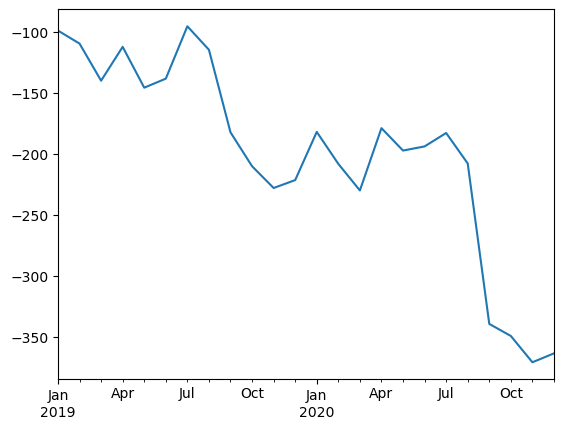

In [127]:
Predictions_Scam.plot()

In [128]:
SD_Scam=seasonal_decompose(data['Close'],extrapolate_trend='freq')

In [129]:
SD_Scam_trend=SD_Scam.trend

<AxesSubplot:xlabel='Date'>

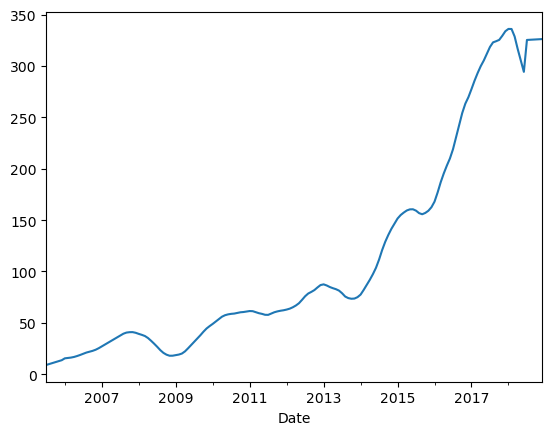

In [130]:
SD_Scam_trend.plot()

In [131]:
Trend_Scam_Arima=auto_arima(SD_Scam_trend,
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=1,
    D=1,
    start_Q=1,
    max_P=None,
    max_D=2,
    max_Q=None,
    max_order=None,
    seasonal=False,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [132]:
Trend_Scam_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  162
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -436.012
Date:                Thu, 21 Sep 2023   AIC                            880.024
Time:                        22:11:01   BIC                            892.325
Sample:                    07-01-2005   HQIC                           885.019
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8203      0.072     11.387      0.000       0.679       0.962
ma.L1         -1.4386      0.069    -20.723      0.000      -1.575      -1.303
ma.L2          0.4460      0.070      6.372      0.000       0.309       0.583
sigma2        13.4686      0.839     16.058      0.000      11.825      15.112
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             30387.57
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              54.86   Skew:                             6.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
modeltScam = SARIMAX(SD_Scam_trend,order=(1,2,2))
Scam_resultst = modeltScam.fit(maxiter=200)
Scam_resultst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  162
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -436.012
Date:                Thu, 21 Sep 2023   AIC                            880.024
Time:                        22:11:02   BIC                            892.325
Sample:                    07-01-2005   HQIC                           885.019
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8203      0.072     11.387      0.000       0.679       0.962
ma.L1         -1.4386      0.069    -20.723      0.000      -1.575      -1.303
ma.L2          0.4460      0.070      6.372      0.000       0.309       0.583
sigma2        13.4686      0.839     16.058      0.000      11.825      15.112
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             30387.57
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              54.86   Skew:                             6.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
resultst_Scam=Scam_resultst.forecast(steps=24, dynamic=False, typ='levels', full_results = True)

In [135]:
Scam_pred=Predictions_Scam+resultst_Scam

In [136]:
Scam_pred

2019-01-01    228.012541
2019-02-01    218.648087
2019-03-01    189.750515
2019-04-01    219.118001
2019-05-01    187.465120
2019-06-01    196.738256
2019-07-01    241.593520
2019-08-01    224.406674
2019-09-01    158.931736
2019-10-01    133.342070
2019-11-01    117.707739
2019-12-01    126.412692
2020-01-01    168.135837
2020-02-01    144.238916
2020-03-01    124.780822
2020-04-01    178.102251
2020-05-01    162.082946
2020-06-01    167.806708
2020-07-01    181.141546
2020-08-01    158.562121
2020-09-01     29.560396
2020-10-01     22.029944
2020-11-01      2.866925
2020-12-01     12.532963
Freq: MS, Name: predicted_mean, dtype: float64

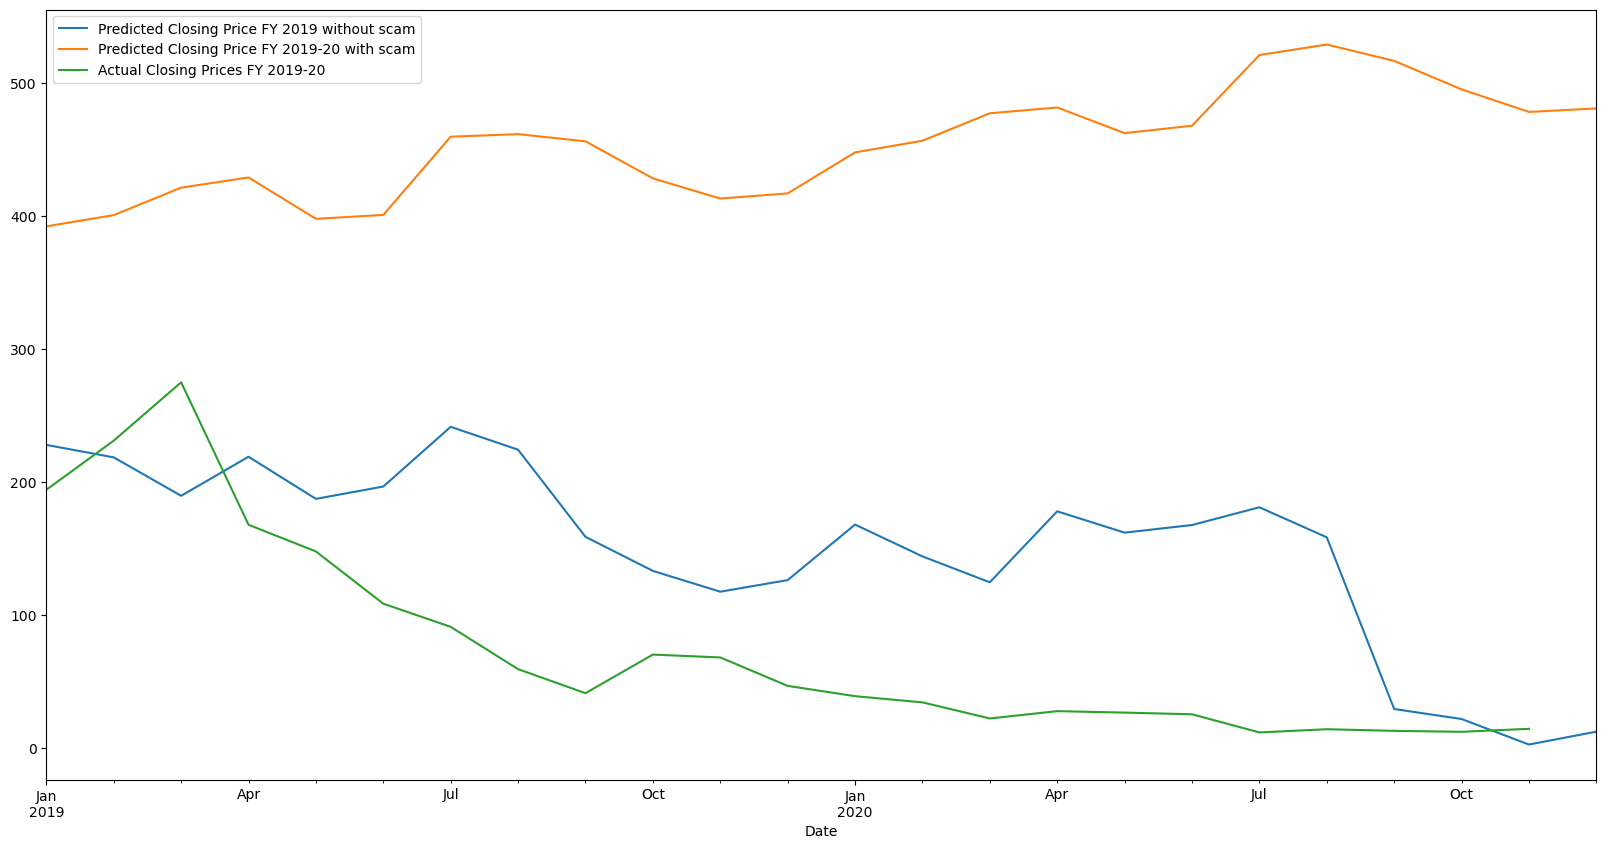

In [137]:
fig,axes=plt.subplots(figsize=(20,10))
Scam_pred.plot()
No_Scam["2019-01-01":].plot()
Yes['Close']["2019-01-01":].plot()
plt.legend(["Predicted Closing Price FY 2019 with scam","Predicted Closing Price FY 2019-20 without scam","Actual Closing Prices FY 2019-20"],loc = "upper left")

In [138]:
Yes['Close']["2019-01-01":]

Date
2019-01-01    194.30
2019-02-01    231.20
2019-03-01    275.05
2019-04-01    168.00
2019-05-01    147.95
2019-06-01    108.70
2019-07-01     91.30
2019-08-01     59.50
2019-09-01     41.45
2019-10-01     70.45
2019-11-01     68.30
2019-12-01     46.95
2020-01-01     39.20
2020-02-01     34.55
2020-03-01     22.45
2020-04-01     27.95
2020-05-01     26.85
2020-06-01     25.60
2020-07-01     11.95
2020-08-01     14.37
2020-09-01     13.15
2020-10-01     12.42
2020-11-01     14.67
Freq: MS, Name: Close, dtype: float64

In [139]:
Yes['Close']["2019-01-01":]-No_Scam["2019-01-01":"2020-11-01"]

Date
2019-01-01   -197.944499
2019-02-01   -169.496911
2019-03-01   -146.273451
2019-04-01   -260.975639
2019-05-01   -249.950144
2019-06-01   -292.158090
2019-07-01   -368.310145
2019-08-01   -402.033186
2019-09-01   -414.708263
2019-10-01   -357.860453
2019-11-01   -344.833288
2019-12-01   -370.061842
2020-01-01   -408.605502
2020-02-01   -422.038216
2020-03-01   -454.772027
2020-04-01   -453.585801
2020-05-01   -435.449160
2020-06-01   -442.244908
2020-07-01   -509.017654
2020-08-01   -514.509288
2020-09-01   -503.436616
2020-10-01   -482.755166
2020-11-01   -463.535342
Freq: MS, dtype: float64

In [140]:
(Yes['Close']["2018-01-01":]-No_Scam["2018-01-01":"2020-11-01"]).mean()

-274.7385730640723

In [141]:
(Yes['Close']["2019-01-01":]-No_Scam["2019-01-01":"2020-11-01"]).mean()

-376.71980839605004

### Most important part upon forecasting, Stock prices on average lost 274(.approx) value taking the scam year into effect and lost Rs 376(.approx) from the predicted price respectively after the scam Happened respectively

In [142]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Yes['Close']["2019-01-01":], No_Scam["2019-01-01":"2020-11-01"])
error1 = mean_squared_error(Yes['Close']["2019-01-01":],Scam_pred["2019-01-01":"2020-11-01"])
print(f'SARIMA MSE Error for not taking scam: {error:11.10}')
print(f'SARIMA MSE Error for taking scam: {error1:11.10}')

SARIMA MSE Error for not taking scam: 153323.7566
SARIMA MSE Error for taking scam: 10734.46517


In [143]:
(Yes['Close']["2018-01-01":]-No_Scam["2018-01-01":"2020-11-01"]).div(No_Scam["2018-01-01":"2020-11-01"]).mul(100).mean()

-61.160162830279376

## Yes Bank <font color='red'>on average lost almost 61% of the predicted non scam stock value starting from the scam year 2018 <font color='black'>all upto 2020 respectively

In [144]:
(Yes['Close']["2019-01-01":]-No_Scam["2019-01-01":"2020-11-01"]).div(No_Scam["2019-01-01":"2020-11-01"]).mul(100).mean()

-82.03026287863352

## Yes Bank <font color='red'>on average lost almost 82% of the predicted non scam stock value after the scam year starting from year 2019 <font color='black'>all upto 2020 respectively. Clearly this implies <font color='red'>2018 defamation dented the reputation of Yes Bank

In [145]:
(Yes['Close']["2019-01-01":]-Scam_pred["2019-01-01":"2020-11-01"]).div(Scam_pred["2019-01-01":"2020-11-01"]).mul(100).mean()

-33.646448157622046

#### If the scam year is taken into account one can predict since Yes Bank's predicted stock price is lower now, from year 2019 they lost on average 33% value respectively 

### Thus without taking the scam in consideration our model was not just significantly overestimated prediction but after taking scam, predictions were predicted very much close to the right direction with  a downward sloping trend but our MSE came down by almost 93% while on average errors due to prediction was as high as 287 (approx) respectively

In [146]:
Error_noScam=No_Scam["2019-01-01":]-Yes['Close']["2019-01-01":]

In [147]:
Error_Scam=Scam_pred-Yes['Close']["2019-01-01":]

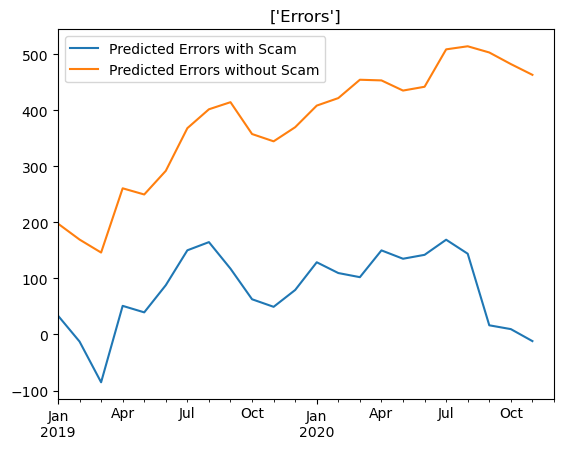

In [148]:
Error_Scam.plot()
Error_noScam.plot()
plt.title(["Errors"])
plt.legend(['Predicted Errors with Scam','Predicted Errors without Scam'])

In [149]:
Error_noScam.mean()

376.71980839605004

In [150]:
Error_Scam.mean()

79.78805934342043

In [151]:
Error_noScam.min()

146.2734511334404

In [152]:
Error_Scam.min()

-85.29948511321027

#### Simple Exponential Smoothing

In [153]:
model_Simple = SimpleExpSmoothing(Prescam["detrended"]).fit(optimized=True)
print(model_Simple.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              detrended   No. Observations:                  150
Model:             SimpleExpSmoothing   SSE                          20133.880
Optimized:                       True   AIC                            738.929
Trend:                           None   BIC                            744.950
Seasonal:                        None   AICC                           739.204
Seasonal Periods:                None   Date:                 Thu, 21 Sep 2023
Box-Cox:                        False   Time:                         22:11:03
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9392772                alpha                 True
initial_level              3.3813476                

In [154]:
Simple_Exp=model_Simple.predict(start='2017-01-01',end='2017-12-01')

<AxesSubplot:xlabel='Date'>

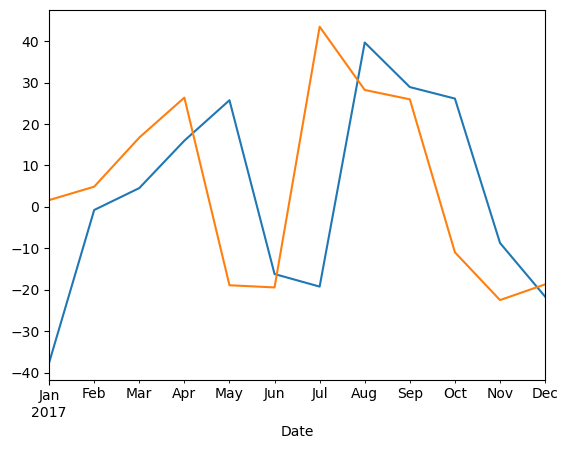

In [155]:
Simple_Exp.plot()
Prescam['detrended']["2017-01-01":].plot()

In [156]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Prescam['detrended']["2017-01-01":], Simple_Exp)
print(f'Simple Exponential Smoothing Error: {error:11.10}')

Simple Exponential Smoothing Error: 791.1563563


#### Double Exponential Smoothing

In [157]:
model_Double = ExponentialSmoothing(Prescam['detrended'],trend='add').fit(optimized=True)
print(model_Double.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                detrended   No. Observations:                  150
Model:             ExponentialSmoothing   SSE                          20130.101
Optimized:                         True   AIC                            742.900
Trend:                         Additive   BIC                            754.943
Seasonal:                          None   AICC                           743.488
Seasonal Periods:                  None   Date:                 Thu, 21 Sep 2023
Box-Cox:                          False   Time:                         22:11:04
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9391574                alpha                 True
smoothing_trend             0.0000

In [158]:
Double_Exp=model_Double.predict(start='2017-01-01',end='2017-12-01')

<AxesSubplot:xlabel='Date'>

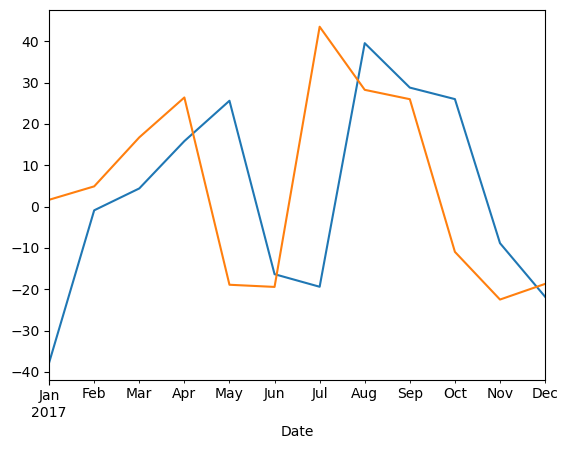

In [159]:
Double_Exp.plot()
Prescam['detrended']["2017-01-01":].plot()

In [160]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Prescam['detrended']["2017-01-01":], Double_Exp)
print(f'Double Exponential Smoothing Error: {error:11.10}')

Double Exponential Smoothing Error: 791.6938834


#### Triple Exponential Smoothing

In [161]:
model_Triple = ExponentialSmoothing(Prescam['detrended'],trend='add',seasonal='add').fit(optimized=True)
print(model_Triple.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                detrended   No. Observations:                  150
Model:             ExponentialSmoothing   SSE                          18833.008
Optimized:                         True   AIC                            756.910
Trend:                         Additive   BIC                            805.080
Seasonal:                      Additive   AICC                           762.131
Seasonal Periods:                    12   Date:                 Thu, 21 Sep 2023
Box-Cox:                          False   Time:                         22:11:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9870579                alpha                 True
smoothing_trend          

In [162]:
Triple_Exp=model_Triple.predict(start='2017-01-01',end='2017-12-01')

<AxesSubplot:xlabel='Date'>

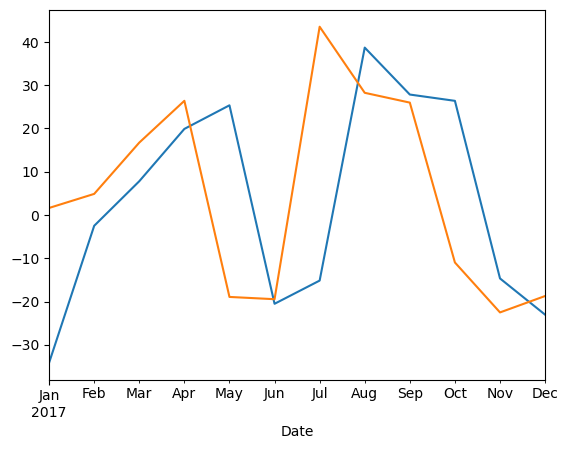

In [163]:
Triple_Exp.plot()
Prescam['detrended']["2017-01-01":].plot()

In [164]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Prescam['detrended']["2017-01-01":], Triple_Exp)
print(f'Triple Exponential Smoothing Error: {error:11.10}')

Triple Exponential Smoothing Error: 703.7845925


### Predicting Returns 

In [165]:
### Checking for stationarity of dataset
adfuller(Prescam['return'])

(-8.708150634850696,
 3.652311284306053e-14,
 1,
 148,
 {'1%': -3.4753253063120644,
  '5%': -2.881274703275226,
  '10%': -2.5772928360116873},
 1094.852221672302)

#### Since returns are stationary for every level of significance we use the data directly for decompositon and from the seasonal decomposition plot done earlier we use level of seasonality as 12

### Prediction

#### Here we do 2 predictions
##### 1)Till 2017 data will be collected and we will use it to predict the stock return of stock prices from 2018-2019 and 2019-2020
##### 2)Till 2018, data will be collected and and predictions of 2019-2020 will be done in order to predict 2019-2020 and difference in predictions will be taken into account for capturing the distortion due to scam respectively.
##### 3)Second prediction series will be compared with actual predictions of 2019-2020 respectively  

### Checking for acf of Returns

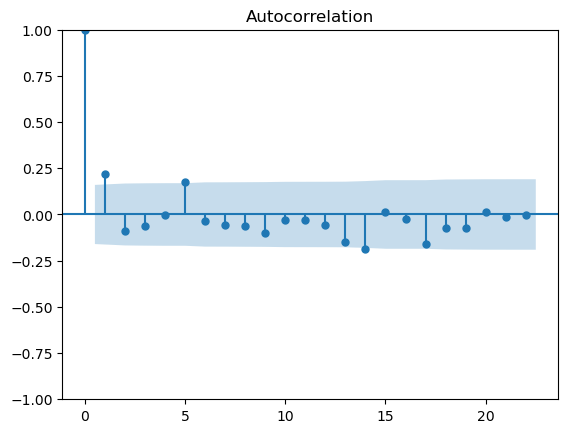

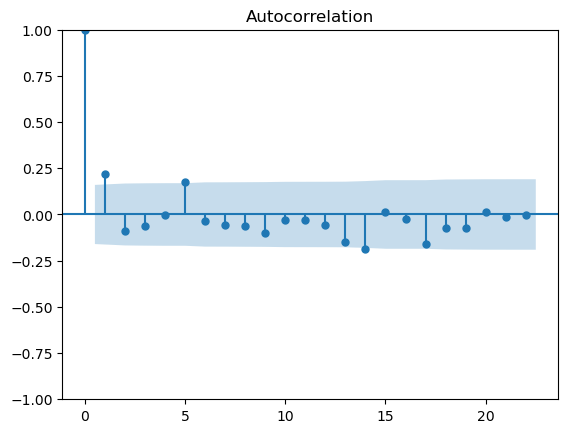

In [166]:
sgt.plot_acf(Prescam['return'])

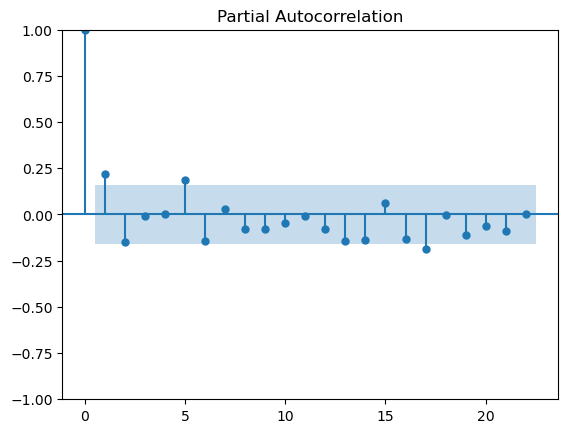

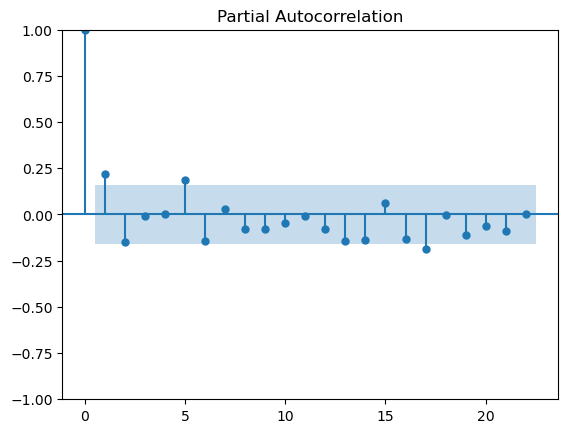

In [167]:
sgt.plot_pacf(Prescam['return'])

#### As it is visible Lag of order 17 might significantly affect current lag but due to risk of overfitting we only consider till Lag 5 which is significant as well just before the 17th lag, similarly from the PACF plot we don't extend till 15th lag , we only consider the 5th lag, hence we start with the ARMA(5,5) model

In [168]:
ARMA5_Return=SARIMAX(Prescam['return'],order=(1,0,1),seasonal_order=(0,0,0,0))
ARMA5_return=ARMA5_Return.fit(maxiter=200)
ARMA5_return.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                  150
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -601.947
Date:                Thu, 21 Sep 2023   AIC                           1209.894
Time:                        22:11:05   BIC                           1218.926
Sample:                    07-01-2005   HQIC                          1213.563
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4900      0.185     -2.650      0.008      -0.852      -0.128
ma.L1          0.7548      0.152      4.962      0.000       0.457       1.053
sigma2       178.8928     14.312     12.500      0.000     150.842     206.944
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.36
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
AR5predict=ARMA5_return.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True)

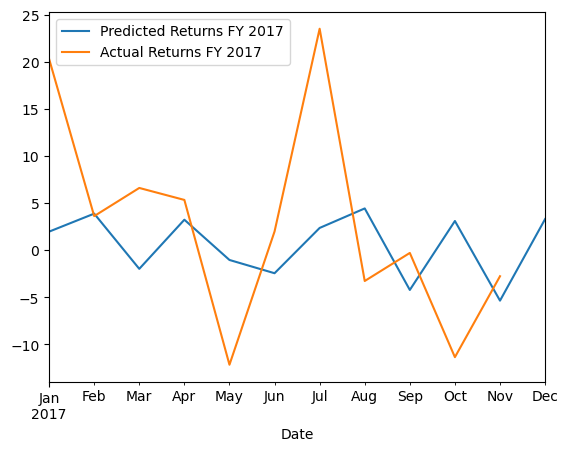

In [170]:
AR5predict.plot()
Prescam['return'][start:end].plot()
plt.legend(["Predicted Returns FY 2017","Actual Returns FY 2017"])

In [171]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Prescam['return']["2017-01-01":], AR5predict)
print(f'AR(5) returns error: {error:11.10}')

AR(5) returns error:  108.019432


In [172]:
AR5_Return_Err=Prescam['return']["2017-01-01":]-AR5predict

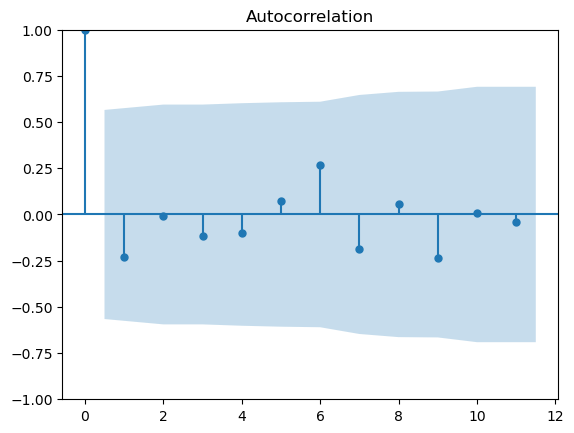

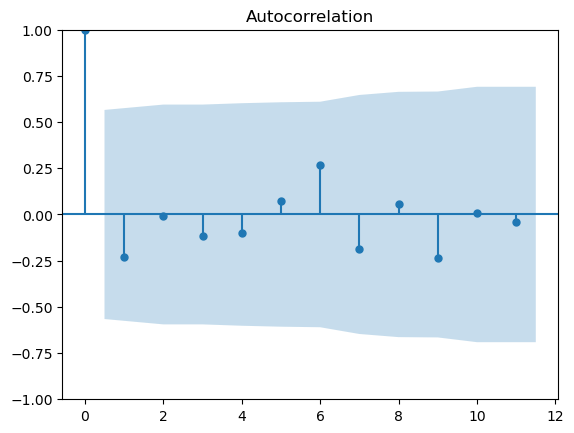

In [173]:
sgt.plot_acf(AR5_Return_Err)

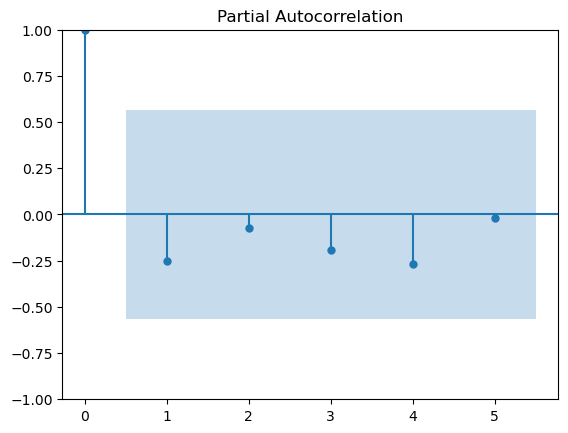

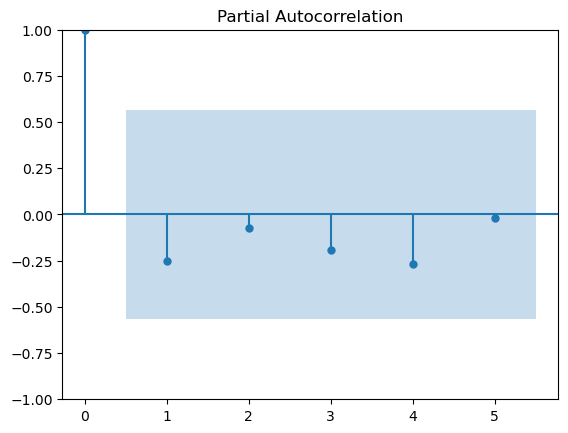

In [174]:
sgt.plot_pacf(AR5_Return_Err,lags=5)

In [175]:
Returns=auto_arima(Prescam['return'],
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=2,
    D=1,
    start_Q=2,
    max_P=None,
    max_D=10,
    max_Q=None,
    max_order=None,
    m=12,
    seasonal=True,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [176]:
Returns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(7, 2, 0)x(6, 1, 0, 12)   Log Likelihood                -577.728
Date:                            Thu, 21 Sep 2023   AIC                           1183.456
Time:                                    22:22:56   BIC                           1224.233
Sample:                                07-01-2005   HQIC                          1200.027
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3237      0.083    -16.022      0.000      -1.486      -1.162
ar.L2         -1.5877      0.128    -12.422      0.000      -1.838      -1.337
ar.L3         -1.6460      0.194     -8.485      0.000      -2.026      -1.266
ar.L4         -1.4785      0.207     -7.127      0.000      -1.885      -1.072
ar.L5         -0.9169      0.184     -4.976      0.000      -1.278      -0.556
ar.L6         -0.6088      0.148     -4.102      0.000      -0.900      -0.318
ar.L7         -0.2465      0.099     -2.481      0.013      -0.441      -0.052
ar.S.L12      -0.8277      0.129     -6.423      0.000      -1.080      -0.575
ar.S.L24      -0.5923      0.160     -3.696      0.000      -0.906      -0.278
ar.S.L36      -0.6717      0.163     -4.119      0.000      -0.991      -0.352
ar.S.L48      -0.6210      0.140     -4.449      0.000      -0.895      -0.347
ar.S.L60      -0.3244      0.166     -1.955      0.051      -0.650       0.001
ar.S.L72      -0.2262      0.147     -1.541      0.123      -0.514       0.062
sigma2       241.7632     31.933      7.571      0.000     179.175     304.351
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.67   Prob(JB):                         0.15
Heteroskedasticity (H):               0.55   Skew:                             0.06
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [177]:
ARIMA_Return=SARIMAX(Prescam['return'],order=(7,2,0),seasonal_order=(6,1,0,12))
ARIMA_return=ARIMA_Return.fit(maxiter=200)
ARIMA_return.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             return   No. Observations:                  150
Model:             SARIMAX(7, 2, 0)x(6, 1, 0, 12)   Log Likelihood                -577.728
Date:                            Thu, 21 Sep 2023   AIC                           1183.456
Time:                                    22:23:09   BIC                           1224.233
Sample:                                07-01-2005   HQIC                          1200.027
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3237      0.083    -16.022      0.000      -1.486      -1.162
ar.L2         -1.5877      0.128    -12.422      0.000      -1.838      -1.337
ar.L3         -1.6460      0.194     -8.485      0.000      -2.026      -1.266
ar.L4         -1.4785      0.207     -7.127      0.000      -1.885      -1.072
ar.L5         -0.9169      0.184     -4.976      0.000      -1.278      -0.556
ar.L6         -0.6088      0.148     -4.102      0.000      -0.900      -0.318
ar.L7         -0.2465      0.099     -2.481      0.013      -0.441      -0.052
ar.S.L12      -0.8277      0.129     -6.423      0.000      -1.080      -0.575
ar.S.L24      -0.5923      0.160     -3.696      0.000      -0.906      -0.278
ar.S.L36      -0.6717      0.163     -4.119      0.000      -0.991      -0.352
ar.S.L48      -0.6210      0.140     -4.449      0.000      -0.895      -0.347
ar.S.L60      -0.3244      0.166     -1.955      0.051      -0.650       0.001
ar.S.L72      -0.2262      0.147     -1.541      0.123      -0.514       0.062
sigma2       241.7632     31.933      7.571      0.000     179.175     304.351
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.67   Prob(JB):                         0.15
Heteroskedasticity (H):               0.55   Skew:                             0.06
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
returnARIMA=ARIMA_return.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True)

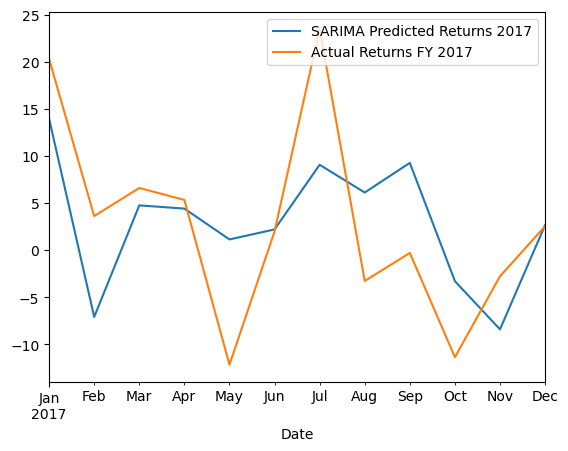

In [179]:
returnARIMA.plot()
Prescam['return'][start:].plot()
plt.legend(["SARIMA Predicted Returns 2017","Actual Returns FY 2017"])

#### Note even without scam our SARIMA model wasn't able to predict the high volatily that came in returns due to the scam , this implies we need time series models that can better model volatilities due to such scams respectively that also implies one might use better models like GARCH or ARCH for that matter respectively

In [180]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(Prescam['return']["2017-01-01":], returnARIMA)
print(f'SARIMA returns error: {error:11.10}')

SARIMA returns error: 68.44368253


In [181]:
Err_Ret=returnARIMA-Prescam['return'][start:end]

<AxesSubplot:xlabel='Date'>

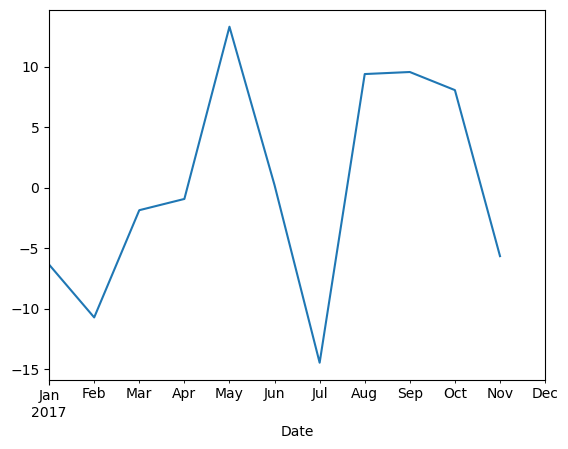

In [182]:
Err_Ret.plot()

In [183]:
returnARIMA_all=ARIMA_return.predict(start="2005-07-01", end="2017-12-01", dynamic=False, typ='levels', full_results = True)

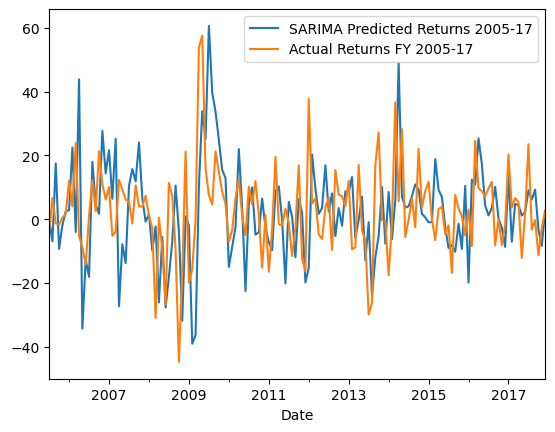

In [184]:
returnARIMA_all.plot()
Prescam['return'].plot()
plt.legend(["SARIMA Predicted Returns 2005-17","Actual Returns FY 2005-17"])

In [185]:
Err_Ret_all=returnARIMA_all-Prescam['return']

<AxesSubplot:xlabel='Date'>

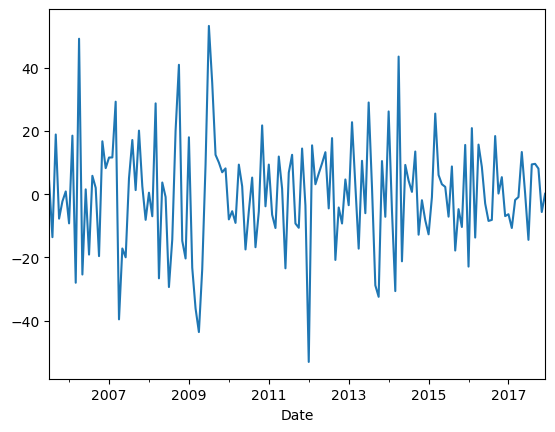

In [186]:
Err_Ret_all.plot()

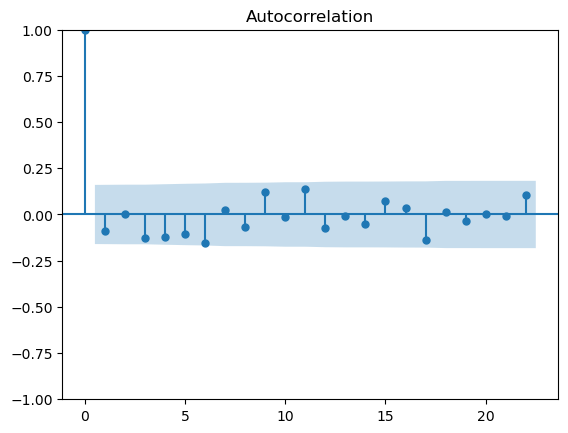

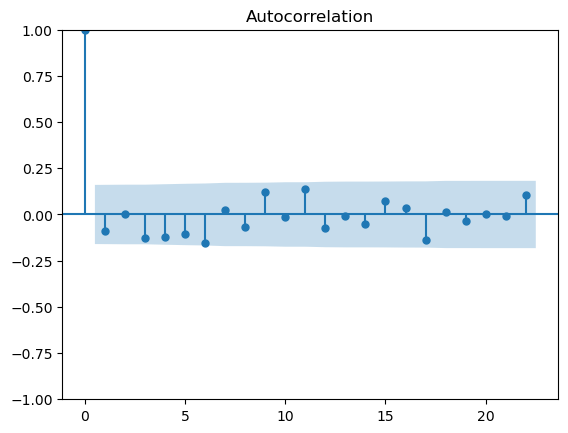

In [187]:
sgt.plot_acf(Err_Ret_all)

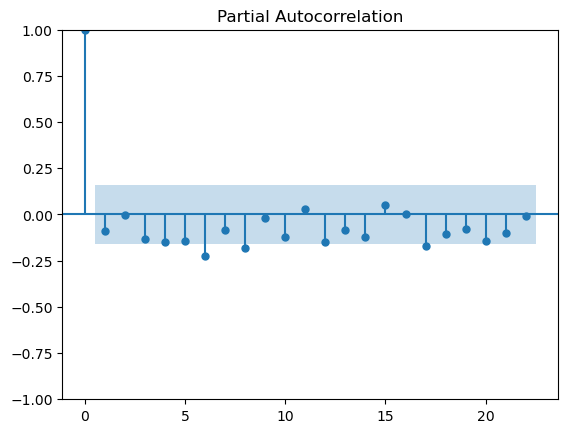

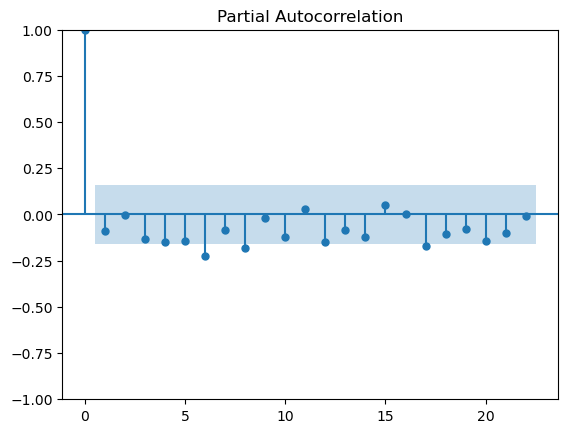

In [188]:
sgt.plot_pacf(Err_Ret_all)

In [189]:
sq_Err_Ret=Err_Ret**2

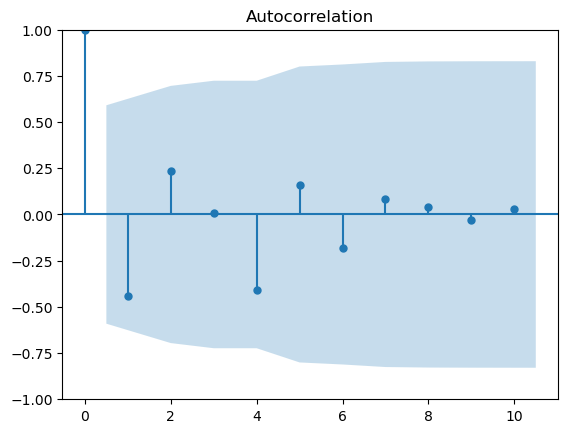

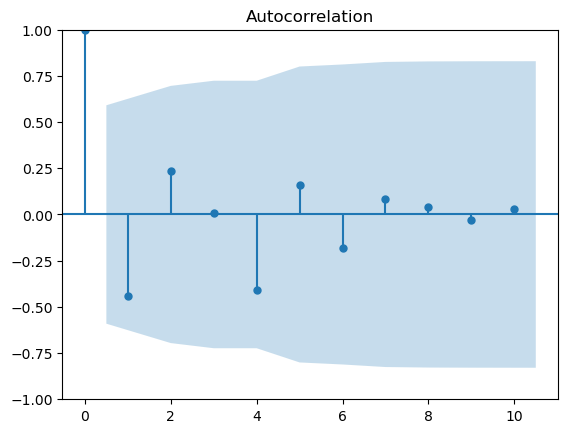

In [190]:
sgt.plot_acf(sq_Err_Ret[:"2017-11-01"])

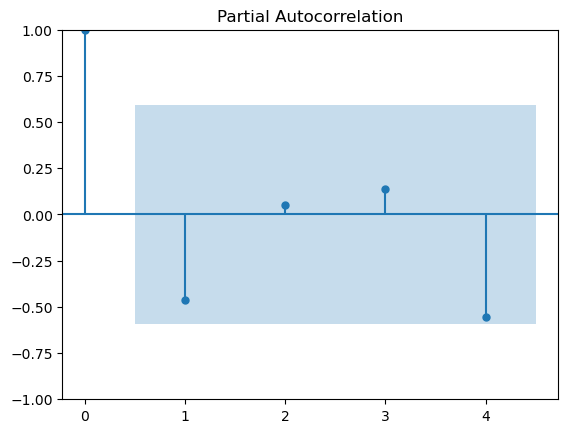

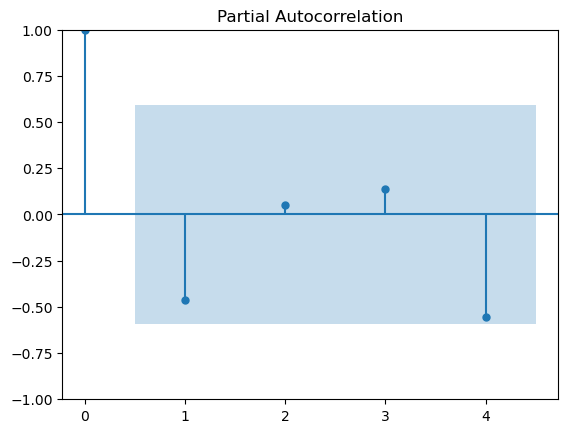

In [236]:
sgt.plot_pacf(sq_Err_Ret[:"2017-11-01"],method="ols",lags=4)

In [191]:
NoScamSarimareturn=ARIMA_return.forecast(steps=36)

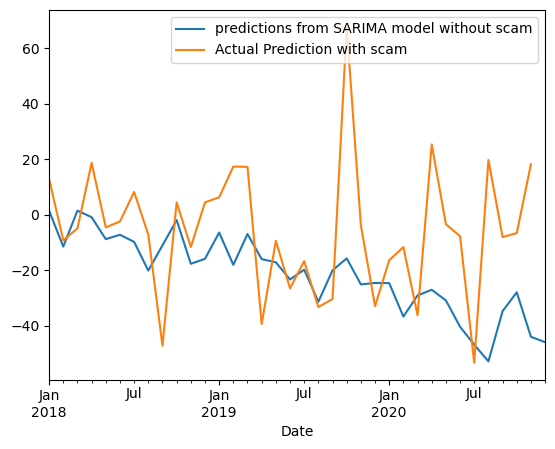

In [192]:
NoScamSarimareturn.plot()
Yes['return']["2018-01-01":].plot()
plt.legend(['predictions from SARIMA model without scam','Actual Prediction with scam'])

#### Note due to scam our SARIMA model wasn't able to predict the high volatily that came in returns due to the scam , this implies we need time series models that can better model volatilities due to such scams respectively that also implies one might use better models like GARCH or ARCH for that matter respectively

In [193]:
data

,Open,High,Low,Close,return,Stat_Close,Stat_Close2,Log_Close,detrended
Date,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-4.153846,NaN,NaN,NaN,3.384393
2005-08-01,12.58,14.88,12.55,13.42,6.677266,0.96,NaN,0.074223,3.424186
2005-09-01,13.48,14.87,12.27,13.30,-1.335312,-0.12,-1.08,-0.008982,2.383979
2005-10-01,13.20,14.47,12.40,12.99,-1.590909,-0.31,-0.19,-0.023584,1.153772
2005-11-01,13.35,13.88,12.88,13.41,0.449438,0.42,0.73,0.031821,0.653565
...,...,...,...,...,...,...,...,...,...
2018-08-01,369.95,404.00,338.00,343.40,-7.176645,-24.50,-52.80,-0.068915,17.974642
2018-09-01,347.20,350.00,166.15,183.45,-47.163018,-159.95,-135.45,-0.626954,-142.143210
2018-10-01,180.00,268.45,168.60,188.05,4.472222,4.60,164.55,0.024766,-137.711063


### Predictions with scam

In [194]:
Returns_Scam=auto_arima(data['return'],
    start_p=2,
    d=2,
    start_q=2,
    max_p=None,
    max_d=5,
    max_q=None,
    start_P=2,
    D=1,
    start_Q=2,
    max_P=None,
    max_D=10,
    max_Q=None,
    max_order=None,
    m=12,
    seasonal=True,
    information_criterion='aic',
    alpha=0.05,
    trend=None,
    maxiter=200,
    suppress_warnings=True)

In [195]:
Returns_Scam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  162
Model:             SARIMAX(8, 2, 0)x(4, 1, [1], 12)   Log Likelihood                -630.329
Date:                              Thu, 21 Sep 2023   AIC                           1288.658
Time:                                      22:31:42   BIC                           1330.619
Sample:                                  07-01-2005   HQIC                          1305.706
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4097      0.076    -18.506      0.000      -1.559      -1.260
ar.L2         -1.7432      0.121    -14.406      0.000      -1.980      -1.506
ar.L3         -1.8415      0.186     -9.883      0.000      -2.207      -1.476
ar.L4         -1.7452      0.222     -7.854      0.000      -2.181      -1.310
ar.L5         -1.2299      0.215     -5.711      0.000      -1.652      -0.808
ar.L6         -0.8612      0.201     -4.284      0.000      -1.255      -0.467
ar.L7         -0.4351      0.149     -2.910      0.004      -0.728      -0.142
ar.L8         -0.1300      0.087     -1.489      0.137      -0.301       0.041
ar.S.L12      -0.0988      0.140     -0.707      0.479      -0.373       0.175
ar.S.L24       0.0197      0.093      0.212      0.832      -0.163       0.202
ar.S.L36      -0.2858      0.106     -2.709      0.007      -0.493      -0.079
ar.S.L48      -0.2006      0.098     -2.053      0.040      -0.392      -0.009
ma.S.L12      -0.8106      0.187     -4.333      0.000      -1.177      -0.444
sigma2       244.4122     34.167      7.154      0.000     177.447     311.378
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.68
Prob(Q):                              0.83   Prob(JB):                         0.04
Heteroskedasticity (H):               0.62   Skew:                             0.11
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
SARIMA_Scam_Return=SARIMAX(data['return'],order=(8,2,0),seasonal_order=(4,1,1,12))
SARIMA_Scam_return=SARIMA_Scam_Return.fit(maxiter=200)
SARIMA_Scam_return.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               return   No. Observations:                  162
Model:             SARIMAX(8, 2, 0)x(4, 1, [1], 12)   Log Likelihood                -630.329
Date:                              Thu, 21 Sep 2023   AIC                           1288.658
Time:                                      22:31:53   BIC                           1330.619
Sample:                                  07-01-2005   HQIC                          1305.706
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4097      0.076    -18.506      0.000      -1.559      -1.260
ar.L2         -1.7432      0.121    -14.406      0.000      -1.980      -1.506
ar.L3         -1.8415      0.186     -9.883      0.000      -2.207      -1.476
ar.L4         -1.7452      0.222     -7.854      0.000      -2.181      -1.310
ar.L5         -1.2299      0.215     -5.711      0.000      -1.652      -0.808
ar.L6         -0.8612      0.201     -4.284      0.000      -1.255      -0.467
ar.L7         -0.4351      0.149     -2.910      0.004      -0.728      -0.142
ar.L8         -0.1300      0.087     -1.489      0.137      -0.301       0.041
ar.S.L12      -0.0988      0.140     -0.707      0.479      -0.373       0.175
ar.S.L24       0.0197      0.093      0.212      0.832      -0.163       0.202
ar.S.L36      -0.2858      0.106     -2.709      0.007      -0.493      -0.079
ar.S.L48      -0.2006      0.098     -2.053      0.040      -0.392      -0.009
ma.S.L12      -0.8106      0.187     -4.333      0.000      -1.177      -0.444
sigma2       244.4122     34.167      7.154      0.000     177.447     311.378
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.68
Prob(Q):                              0.83   Prob(JB):                         0.04
Heteroskedasticity (H):               0.62   Skew:                             0.11
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [197]:
Pred_Ret_Scam=SARIMA_Scam_return.forecast(steps=24)

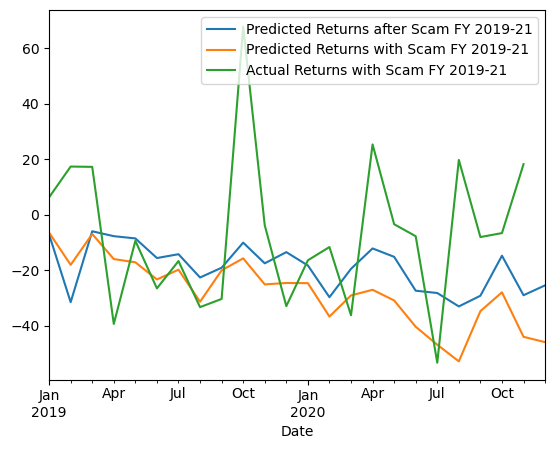

In [198]:
Pred_Ret_Scam.plot()
NoScamSarimareturn["2019-01-01":].plot()
Yes['return']["2019-01-01":].plot()
plt.legend(["Predicted Returns after Scam FY 2019-21","Predicted Returns with Scam FY 2019-21","Actual Returns with Scam FY 2019-21"])
plt.show()

In [199]:
Error_Return_Scam=Yes['return']["2019-01-01":]-Pred_Ret_Scam
Error_Return_NoScam=Yes['return']["2019-01-01":]-NoScamSarimareturn["2019-01-01":]

<AxesSubplot:>

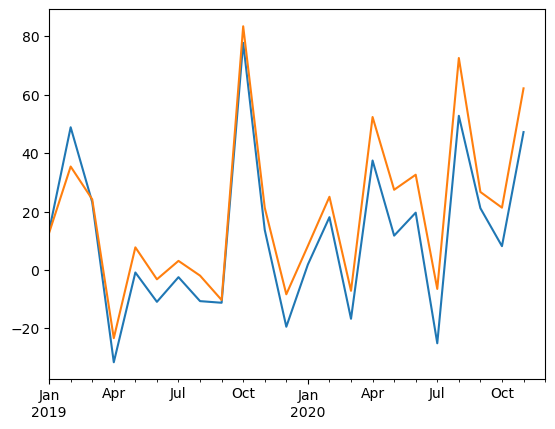

In [200]:
Error_Return_Scam.plot()
Error_Return_NoScam.plot()

In [201]:
def f(x):
    y=x**2
    return y

In [202]:
Sqd_Error_Return_Scam=Error_Return_Scam.apply(f)
Sqd_Error_Return_NoScam=Error_Return_NoScam.apply(f)

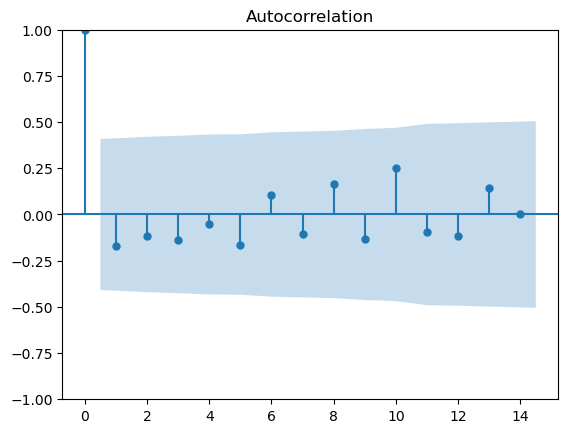

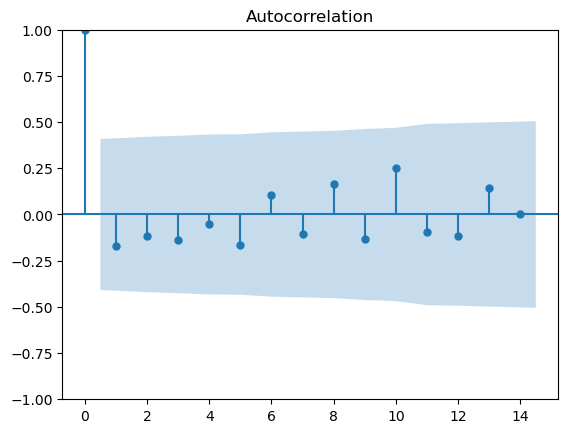

In [203]:
sgt.plot_acf(Sqd_Error_Return_Scam[:"2020-11-01"])

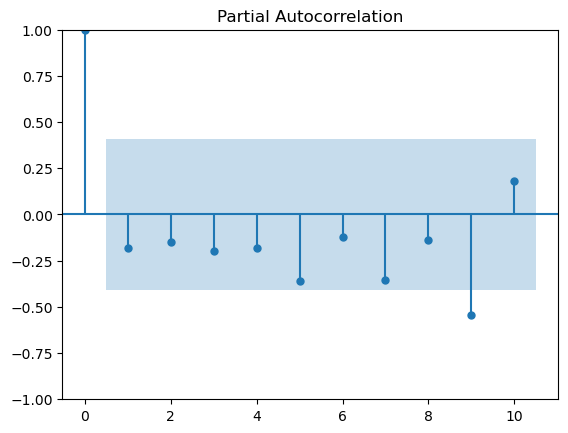

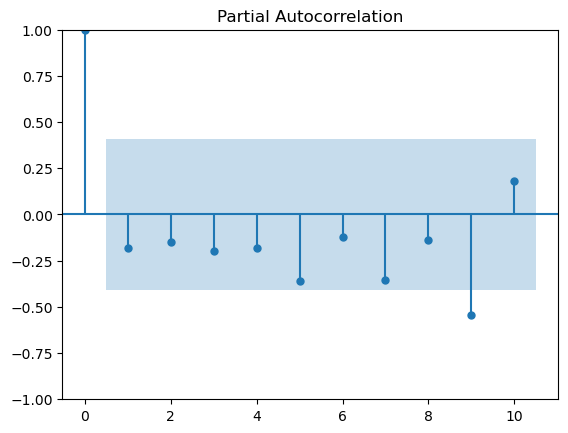

In [204]:
sgt.plot_pacf(Sqd_Error_Return_Scam[:"2020-11-01"],lags=10,method='ols')

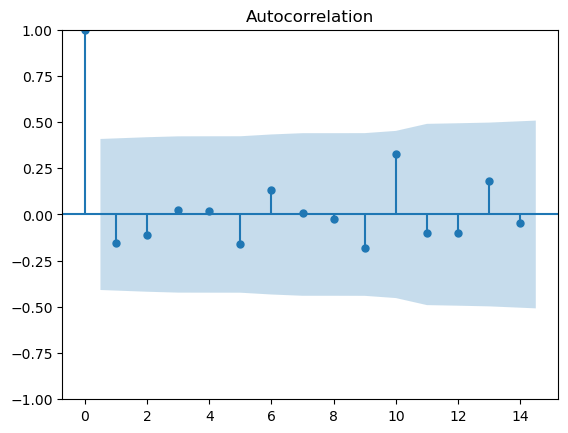

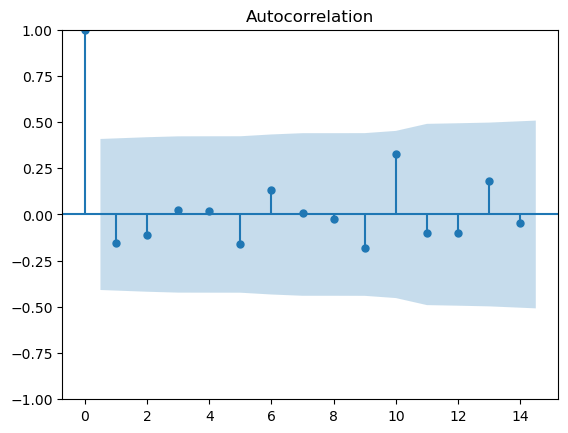

In [205]:
sgt.plot_acf(Sqd_Error_Return_NoScam[:"2020-11-01"])

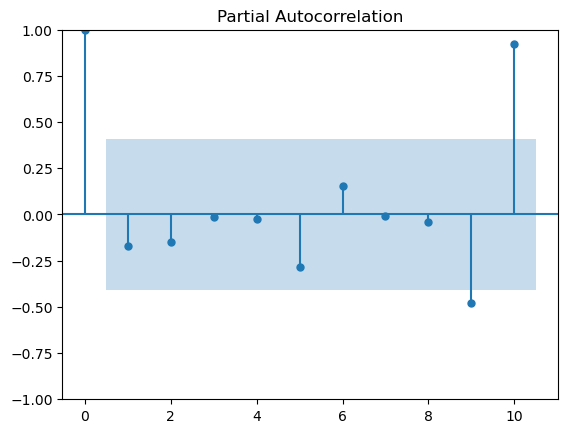

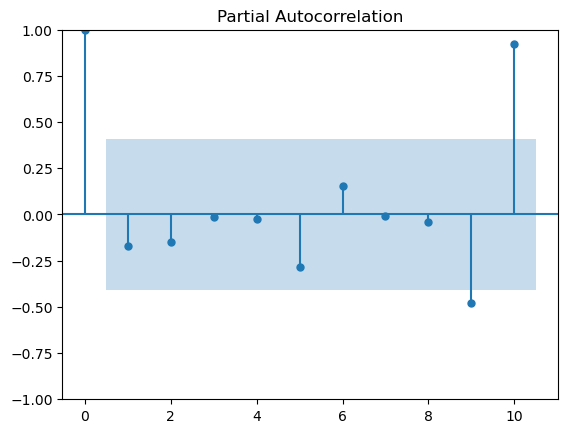

In [206]:
sgt.plot_pacf(Sqd_Error_Return_NoScam[:"2020-11-01"],lags=10,method='ols')

#### Simple Exponential Smoothing

In [207]:
model_Simple_returns = SimpleExpSmoothing(Prescam["return"]).fit(optimized=True)
print(model_Simple_returns.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                 return   No. Observations:                  150
Model:             SimpleExpSmoothing   SSE                          28311.737
Optimized:                       True   AIC                            790.059
Trend:                           None   BIC                            796.081
Seasonal:                        None   AICC                           790.335
Seasonal Periods:                None   Date:                 Thu, 21 Sep 2023
Box-Cox:                        False   Time:                         22:31:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
initial_level              2.6258738                

In [208]:
Simple_Exp_return=model_Simple_returns.predict(start='2017-01-01',end='2017-12-01')

<AxesSubplot:xlabel='Date'>

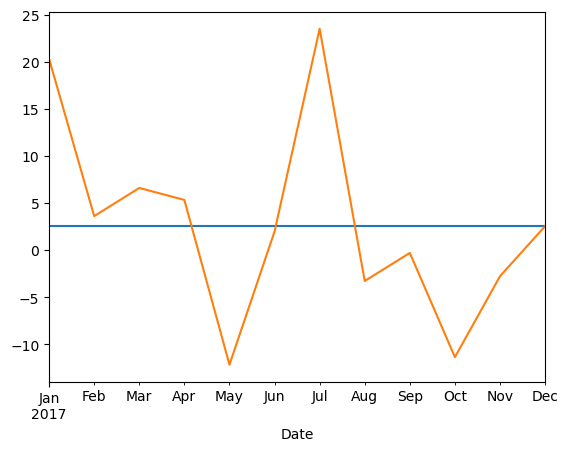

In [209]:
Simple_Exp_return.plot()
data['return']['2017-01-01':'2017-12-01'].plot()

In [210]:
error = mean_squared_error(Prescam['return']["2017-01-01":], Simple_Exp_return)
print(f'Simple Exponential Smoothing Error: {error:11.10}')

Simple Exponential Smoothing Error: 104.9944626


#### Double Exponential Smoothing Error

In [211]:
model_Double_return = ExponentialSmoothing(Prescam['return'],trend='add').fit(optimized=True)
print(model_Double_return.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   return   No. Observations:                  150
Model:             ExponentialSmoothing   SSE                          28337.340
Optimized:                         True   AIC                            794.195
Trend:                         Additive   BIC                            806.238
Seasonal:                          None   AICC                           794.782
Seasonal Periods:                  None   Date:                 Thu, 21 Sep 2023
Box-Cox:                          False   Time:                         22:31:55
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0009096                alpha                 True
smoothing_trend           3.6668e-

In [212]:
Double_Exp_return=model_Double_return.predict(start='2017-01-01',end='2017-12-01')

<AxesSubplot:xlabel='Date'>

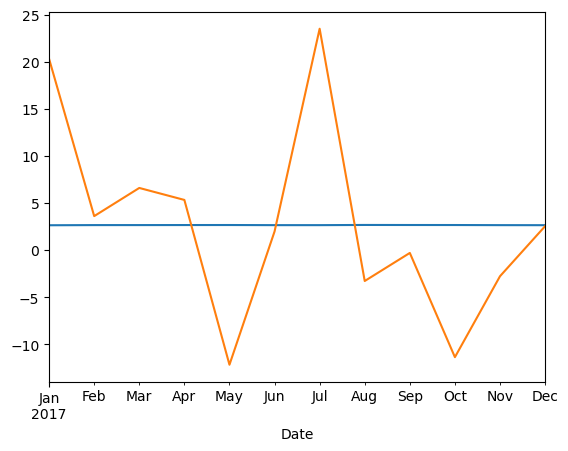

In [213]:
Double_Exp_return.plot()
data['return']['2017-01-01':'2017-12-01'].plot()

In [214]:
error = mean_squared_error(Prescam['return']["2017-01-01":], Double_Exp_return)
print(f'Double Exponential Smoothing Error: {error:11.10}')

Double Exponential Smoothing Error: 105.0918395


#### Triple Exponential Smoothing

In [215]:
model_Triple_return = ExponentialSmoothing(Prescam['return'],trend='add',seasonal='add').fit(optimized=True)
print(model_Triple_return.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   return   No. Observations:                  150
Model:             ExponentialSmoothing   SSE                          26358.029
Optimized:                         True   AIC                            807.334
Trend:                         Additive   BIC                            855.504
Seasonal:                      Additive   AICC                           812.555
Seasonal Periods:                    12   Date:                 Thu, 21 Sep 2023
Box-Cox:                          False   Time:                         22:31:55
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              2.2613e-08                alpha                 True
smoothing_trend          

In [216]:
Triple_Exp_return=model_Triple_return.predict(start='2017-01-01',end='2017-12-01')

<AxesSubplot:xlabel='Date'>

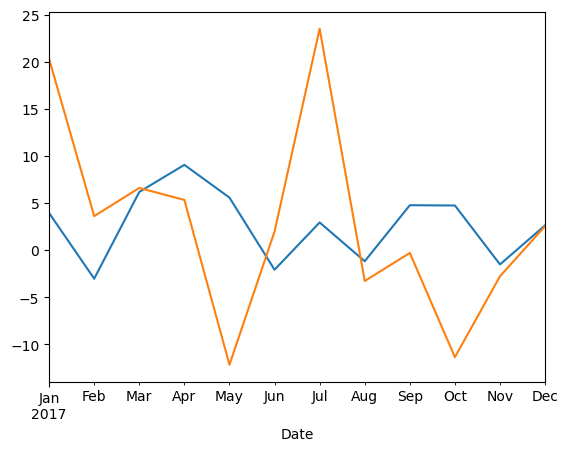

In [217]:
Triple_Exp_return.plot()
Prescam['return']['2017-01-01':'2017-12-01'].plot()

In [218]:
error = mean_squared_error(Prescam['return']["2017-01-01":], Triple_Exp_return)
print(f'Triple Exponential Smoothing Error: {error:11.10}')

Triple Exponential Smoothing Error: 114.2499222


### Fitting an ARCH model

In [219]:
Ret_square=Prescam['return'].mul(Prescam['return'])

<AxesSubplot:xlabel='Date'>

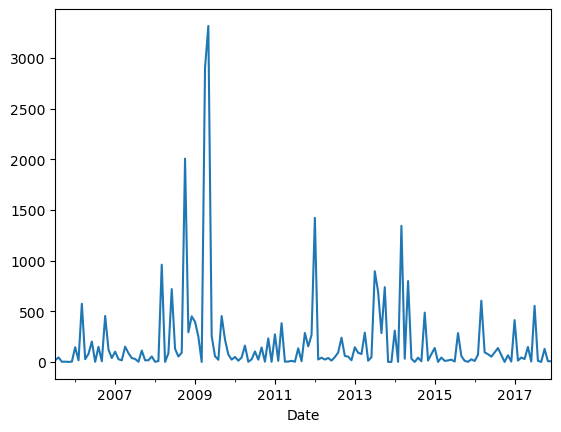

In [220]:
Ret_square.plot()

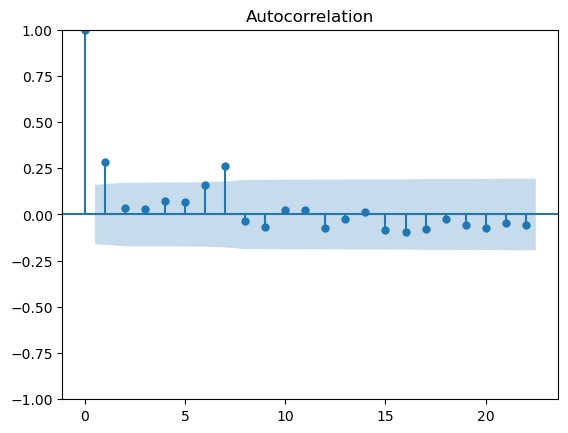

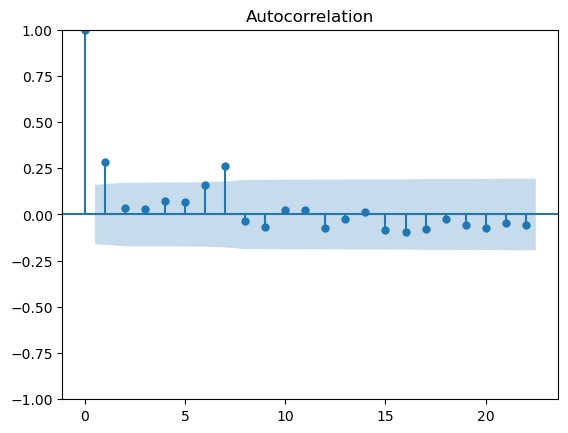

In [221]:
sgt.plot_acf(Ret_square)

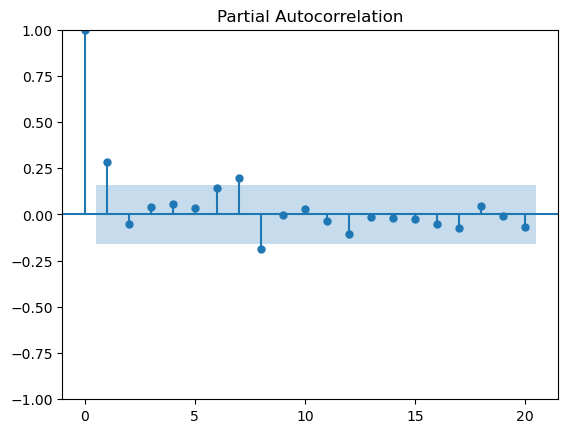

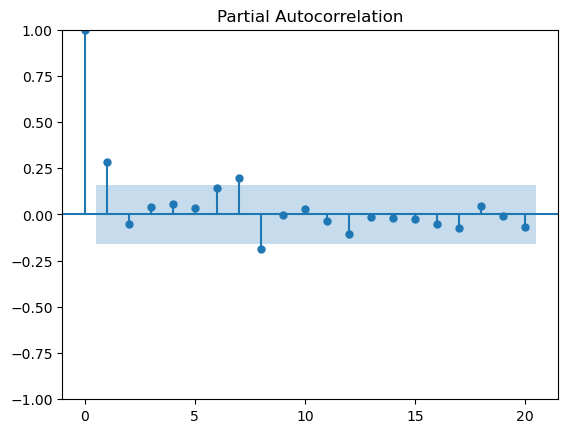

In [222]:
sgt.plot_pacf(Ret_square,method='ols',lags=20)

### Here from the acf plot we find 5th order lag to be significant while from the pacf plot we find that 7th order lag to be significant 

In [223]:
model_arch_1= arch_model(Prescam['return'][1:])
results_arch_1=model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 683.3559614883817
Iteration:      2,   Func. Count:     12,   Neg. LLF: 640.1386915689361
Iteration:      3,   Func. Count:     18,   Neg. LLF: 601.0768160175196
Iteration:      4,   Func. Count:     25,   Neg. LLF: 593.5843651486275
Iteration:      5,   Func. Count:     30,   Neg. LLF: 593.5521892390835
Iteration:      6,   Func. Count:     35,   Neg. LLF: 593.5250162358413
Iteration:      7,   Func. Count:     40,   Neg. LLF: 593.4213559186086
Iteration:      8,   Func. Count:     45,   Neg. LLF: 593.2973769443335
Iteration:      9,   Func. Count:     50,   Neg. LLF: 593.1638525754063
Iteration:     10,   Func. Count:     55,   Neg. LLF: 593.0885918610304
Iteration:     11,   Func. Count:     60,   Neg. LLF: 593.0744996864554
Iteration:     12,   Func. Count:     65,   Neg. LLF: 593.0740872371763
Iteration:     13,   Func. Count:     70,   Neg. LLF: 593.0740747773009
Iteration:     14,   Func. Count:     75,   Neg. LLF: 593.074073

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -593.074
Distribution:                  Normal   AIC:                           1194.15
Method:            Maximum Likelihood   BIC:                           1206.16
                                        No. Observations:                  149
Date:                Thu, Sep 21 2023   Df Residuals:                      148
Time:                        22:31:57   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.2959      1.113      2.960  3.074e-03 [  1.114,  5.478]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         29.7941     13.447      2.216  2.671e-02    [  3.439, 56.149]
alpha[1]       0.1809  9.256e-02      1.954  5.068e-02 [-5.367e-04,  0.362]
beta[1]        0.6664  8.274e-02      8.054  8.026e-16    [  0.504,  0.829]
===========================================================================

Covariance estimator: robust
"""

### The Simple ARCH(7) model since ACF and PACF both has significant lags till spike 1

In [248]:
model_arch_7= arch_model(Prescam['return'][1:],vol="GARCH",p=7,q=2)
results_arch_7=model_arch_7.fit()
results_arch_7.summary()

Iteration:      1,   Func. Count:     13,   Neg. LLF: 623.7618033593135
Iteration:      2,   Func. Count:     26,   Neg. LLF: 612.5618506413382
Iteration:      3,   Func. Count:     40,   Neg. LLF: 607.5002002648921
Iteration:      4,   Func. Count:     53,   Neg. LLF: 614.4086038104078
Iteration:      5,   Func. Count:     67,   Neg. LLF: 607.5136926541469
Iteration:      6,   Func. Count:     80,   Neg. LLF: 615.9060159938654
Iteration:      7,   Func. Count:     93,   Neg. LLF: 591.6610256277726
Iteration:      8,   Func. Count:    106,   Neg. LLF: 593.5947809013176
Iteration:      9,   Func. Count:    119,   Neg. LLF: 589.6791501014876
Iteration:     10,   Func. Count:    131,   Neg. LLF: 591.9829267819296
Iteration:     11,   Func. Count:    144,   Neg. LLF: 589.6002598315393
Iteration:     12,   Func. Count:    156,   Neg. LLF: 589.5827792343921
Iteration:     13,   Func. Count:    168,   Neg. LLF: 589.5766655398058
Iteration:     14,   Func. Count:    180,   Neg. LLF: 589.547084

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -588.718
Distribution:                  Normal   AIC:                           1199.44
Method:            Maximum Likelihood   BIC:                           1232.48
                                        No. Observations:                  149
Date:                Fri, Sep 22 2023   Df Residuals:                      148
Time:                        04:03:40   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.3570      1.401      1.682  9.256e-02 [ -0.389,  5.103]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         84.0233     47.156      1.782  7.478e-02 [ -8.401,1.764e+02]
alpha[1]       0.0670      0.136      0.493      0.622   [ -0.200,  0.334]
alpha[2]       0.0407      0.252      0.162      0.872   [ -0.453,  0.535]
alpha[3]       0.1021      0.105      0.976      0.329   [ -0.103,  0.307]
alpha[4]   4.5653e-14      0.424  1.078e-13      1.000   [ -0.830,  0.830]
alpha[5]       0.0000      0.661      0.000      1.000   [ -1.296,  1.296]
alpha[6]       0.0840      0.137      0.613      0.540   [ -0.184,  0.352]
alpha[7]       0.2281  8.805e-02      2.590  9.595e-03 [5.549e-02,  0.401]
beta[1]        0.0000      0.238      0.000      1.000   [ -0.467,  0.467]
beta[2]        0.0000      0.339      0.000      1.000   [ -0.665,  0.665]
==========================================================================

Covariance estimator: robust
"""

In [249]:
ARCH_Predict=results_arch_7.forecast(start="2005-07-01")

<AxesSubplot:xlabel='Date'>

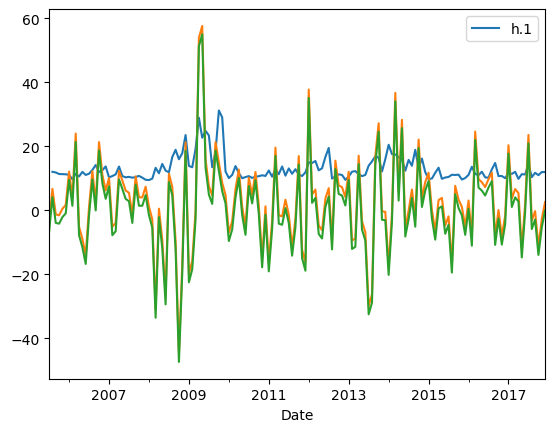

In [250]:
np.sqrt(ARCH_Predict.variance["2005-07-01":]).plot()
Prescam['return'].plot()
Prescamdev.plot()